# Week 5: Functions: Exponential and Inverse

**Course:** Mathematics for Data Science I (BSMA1001)  
**Week:** 5 of 12

## Learning Objectives
- Exponential function properties
- Exponential growth and decay
- Inverse function theorem
- One-to-one functions
- Applications in compound interest


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize, integrate
import sympy as sp
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import warnings

# Configuration
np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')
sp.init_printing()
warnings.filterwarnings('ignore')

# Set font for better Unicode support
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.dpi'] = 100

# Define symbolic variable
x = sp.Symbol('x')
t = sp.Symbol('t', positive=True)

# Display library versions
print("=" * 70)
print("LIBRARY VERSIONS")
print("=" * 70)
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"SymPy: {sp.__version__}")
print(f"SciPy: {sp.__version__}")
print("=" * 70)
print("✓ All libraries loaded successfully")
print("=" * 70)

LIBRARY VERSIONS
NumPy: 2.0.2
Pandas: 2.3.3
Matplotlib: 3.9.4
SymPy: 1.14.0
SciPy: 1.14.0
✓ All libraries loaded successfully


## 1. Exponential Function Properties

### **Definition: Exponential Function**

An **exponential function** has the form:

$$f(x) = a^x$$

where:
- $a > 0$ is the **base** (constant)
- $x$ is the **exponent** (variable)
- $a \neq 1$ (otherwise function is constant)

**Most Important Base**: $e \approx 2.71828$ (Euler's number)

$$f(x) = e^x$$

---

### **Why Is $e$ Special?**

**Euler's number** $e$ is defined as:

$$e = \lim_{n \to \infty} \left(1 + \frac{1}{n}\right)^n \approx 2.71828\ldots$$

**Unique Property**: $\frac{d}{dx}(e^x) = e^x$ — the only function that is its own derivative!

**Alternative Definition**:
$$e = \sum_{n=0}^{\infty} \frac{1}{n!} = 1 + 1 + \frac{1}{2} + \frac{1}{6} + \frac{1}{24} + \cdots$$

---

### **Fundamental Properties of Exponential Functions**

#### **1. Domain and Range**
- **Domain**: $(-\infty, \infty)$ — defined for all real numbers
- **Range**: $(0, \infty)$ — always positive, never zero or negative

$$e^x > 0 \text{ for all } x \in \mathbb{R}$$

#### **2. Exponential Laws (Exponent Rules)**

$$\begin{aligned}
a^m \cdot a^n &= a^{m+n} & \text{(Product rule)} \\
\frac{a^m}{a^n} &= a^{m-n} & \text{(Quotient rule)} \\
(a^m)^n &= a^{mn} & \text{(Power rule)} \\
a^0 &= 1 & \text{(Zero exponent)} \\
a^{-n} &= \frac{1}{a^n} & \text{(Negative exponent)} \\
a^{1/n} &= \sqrt[n]{a} & \text{(Fractional exponent)}
\end{aligned}$$

#### **3. Monotonicity**

For base $a > 1$ (like $e$):
- **Strictly increasing**: If $x_1 < x_2$, then $a^{x_1} < a^{x_2}$
- Grows without bound: $\lim_{x \to \infty} a^x = \infty$
- Approaches zero: $\lim_{x \to -\infty} a^x = 0$

For base $0 < a < 1$:
- **Strictly decreasing**: If $x_1 < x_2$, then $a^{x_1} > a^{x_2}$

#### **4. Continuity and Smoothness**
- Continuous everywhere (no breaks or jumps)
- Infinitely differentiable (smooth curve)
- No inflection points for $e^x$

#### **5. Special Values**

$$\begin{aligned}
e^0 &= 1 \\
e^1 &= e \approx 2.718 \\
e^{\ln(k)} &= k \text{ for } k > 0 \\
e^{-\infty} &= 0 \\
e^{\infty} &= \infty
\end{aligned}$$

---

### **Natural Exponential vs Other Bases**

| **Base** | **Function** | **Behavior** | **Use Case** |
|----------|--------------|--------------|--------------|
| $e$ | $e^x$ | Natural growth, calculus-friendly | Continuous compounding, natural processes |
| $2$ | $2^x$ | Doubling | Computer science (binary), population |
| $10$ | $10^x$ | Powers of 10 | Scientific notation, pH scale |
| $0 < a < 1$ | $0.5^x$ | Decay | Half-life, depreciation |

**Converting Between Bases**:
$$a^x = e^{x \ln(a)}$$

---

### **Exponential vs Polynomial Growth**

**Key Insight**: Exponential functions grow **much faster** than polynomials.

For large $x$:
$$e^x \gg x^n \text{ for any fixed } n$$

**Example**: $e^{20} \approx 485,000,000$ while $20^{10} = 10,240,000,000,000$

But for $x = 100$: $e^{100} \approx 2.7 \times 10^{43}$ while $100^{10} = 10^{20}$

---

### **Data Science Applications**

1. **Machine Learning**:
   - **Softmax function**: $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$ (multi-class classification)
   - **Sigmoid activation**: $\sigma(x) = \frac{1}{1 + e^{-x}}$ (logistic regression, neural networks)
   - **Exponential loss**: Used in boosting algorithms

2. **Probability & Statistics**:
   - **Exponential distribution**: $f(x) = \lambda e^{-\lambda x}$ (waiting times)
   - **Normal distribution**: Contains $e^{-x^2/2}$ term
   - **Poisson distribution**: $P(k) = \frac{\lambda^k e^{-\lambda}}{k!}$

3. **Natural Processes**:
   - Population growth: $P(t) = P_0 e^{rt}$
   - Radioactive decay: $N(t) = N_0 e^{-\lambda t}$
   - Chemical reactions: Rate laws with $e^{-E_a/RT}$

4. **Finance**:
   - Continuous compounding: $A = Pe^{rt}$
   - Black-Scholes option pricing: Contains exponential terms
   - Interest rate models

5. **Computer Science**:
   - Time complexity: $O(2^n)$ exponential algorithms
   - Information theory: Entropy involves logarithms (inverse of exponential)
   - Cryptography: Modular exponentiation

---

### **Common Pitfalls**

⚠️ **$e^x$ never equals zero**: Always positive  
⚠️ **Exponent rules don't apply to addition**: $e^{a+b} = e^a \cdot e^b$ (NOT $e^a + e^b$)  
⚠️ **Base confusion**: $e^x \neq x^e$ (very different functions!)  
⚠️ **Growth rate**: Exponential dominates polynomial for large $x$  
⚠️ **Negative base**: $(-2)^x$ not defined for all real $x$ (only integers)

In [37]:
# Exponential Function Properties

print("=" * 70)
print("EXPONENTIAL FUNCTION PROPERTIES")
print("=" * 70)

# Computing e using different methods
print("\n1. COMPUTING EULER'S NUMBER e")
print("-" * 50)

# Method 1: Limit definition
n_values = [10, 100, 1000, 10000, 100000]
print("   Method 1: Limit definition e = lim(n→∞) (1 + 1/n)^n")
for n in n_values:
    e_approx = (1 + 1/n)**n
    error = abs(e_approx - np.e)
    print(f"   n = {n:6d}: e ≈ {e_approx:.10f}, error = {error:.2e}")

# Method 2: Series expansion
print("\n   Method 2: Series expansion e = Σ(1/n!) from n=0 to ∞")
e_series = 0
for n in range(20):
    e_series += 1 / np.math.factorial(n)
    if n in [5, 10, 15, 19]:
        error = abs(e_series - np.e)
        print(f"   n = {n:2d}: e ≈ {e_series:.10f}, error = {error:.2e}")

print(f"\n   NumPy's e: {np.e:.15f}")
print(f"   SymPy's e: {float(sp.E):.15f}")

# Exponential Laws Demonstration
print("\n2. EXPONENTIAL LAWS VERIFICATION")
print("-" * 50)

a, b = 2.5, 3.2
print(f"\n   Base a = {a}, exponents m = 2, n = 3")
print(f"\n   Product rule: a^m · a^n = a^(m+n)")
print(f"   {a}^2 · {a}^3 = {a**2 * a**3:.4f}")
print(f"   {a}^(2+3) = {a}^5 = {a**5:.4f} ✓")

print(f"\n   Quotient rule: a^m / a^n = a^(m-n)")
print(f"   {a}^3 / {a}^2 = {a**3 / a**2:.4f}")
print(f"   {a}^(3-2) = {a}^1 = {a**1:.4f} ✓")

print(f"\n   Power rule: (a^m)^n = a^(mn)")
print(f"   ({a}^2)^3 = {(a**2)**3:.4f}")
print(f"   {a}^(2·3) = {a}^6 = {a**6:.4f} ✓")

EXPONENTIAL FUNCTION PROPERTIES

1. COMPUTING EULER'S NUMBER e
--------------------------------------------------
   Method 1: Limit definition e = lim(n→∞) (1 + 1/n)^n
   n =     10: e ≈ 2.5937424601, error = 1.25e-01
   n =    100: e ≈ 2.7048138294, error = 1.35e-02
   n =   1000: e ≈ 2.7169239322, error = 1.36e-03
   n =  10000: e ≈ 2.7181459268, error = 1.36e-04
   n = 100000: e ≈ 2.7182682372, error = 1.36e-05

   Method 2: Series expansion e = Σ(1/n!) from n=0 to ∞


AttributeError: module 'numpy' has no attribute 'math'

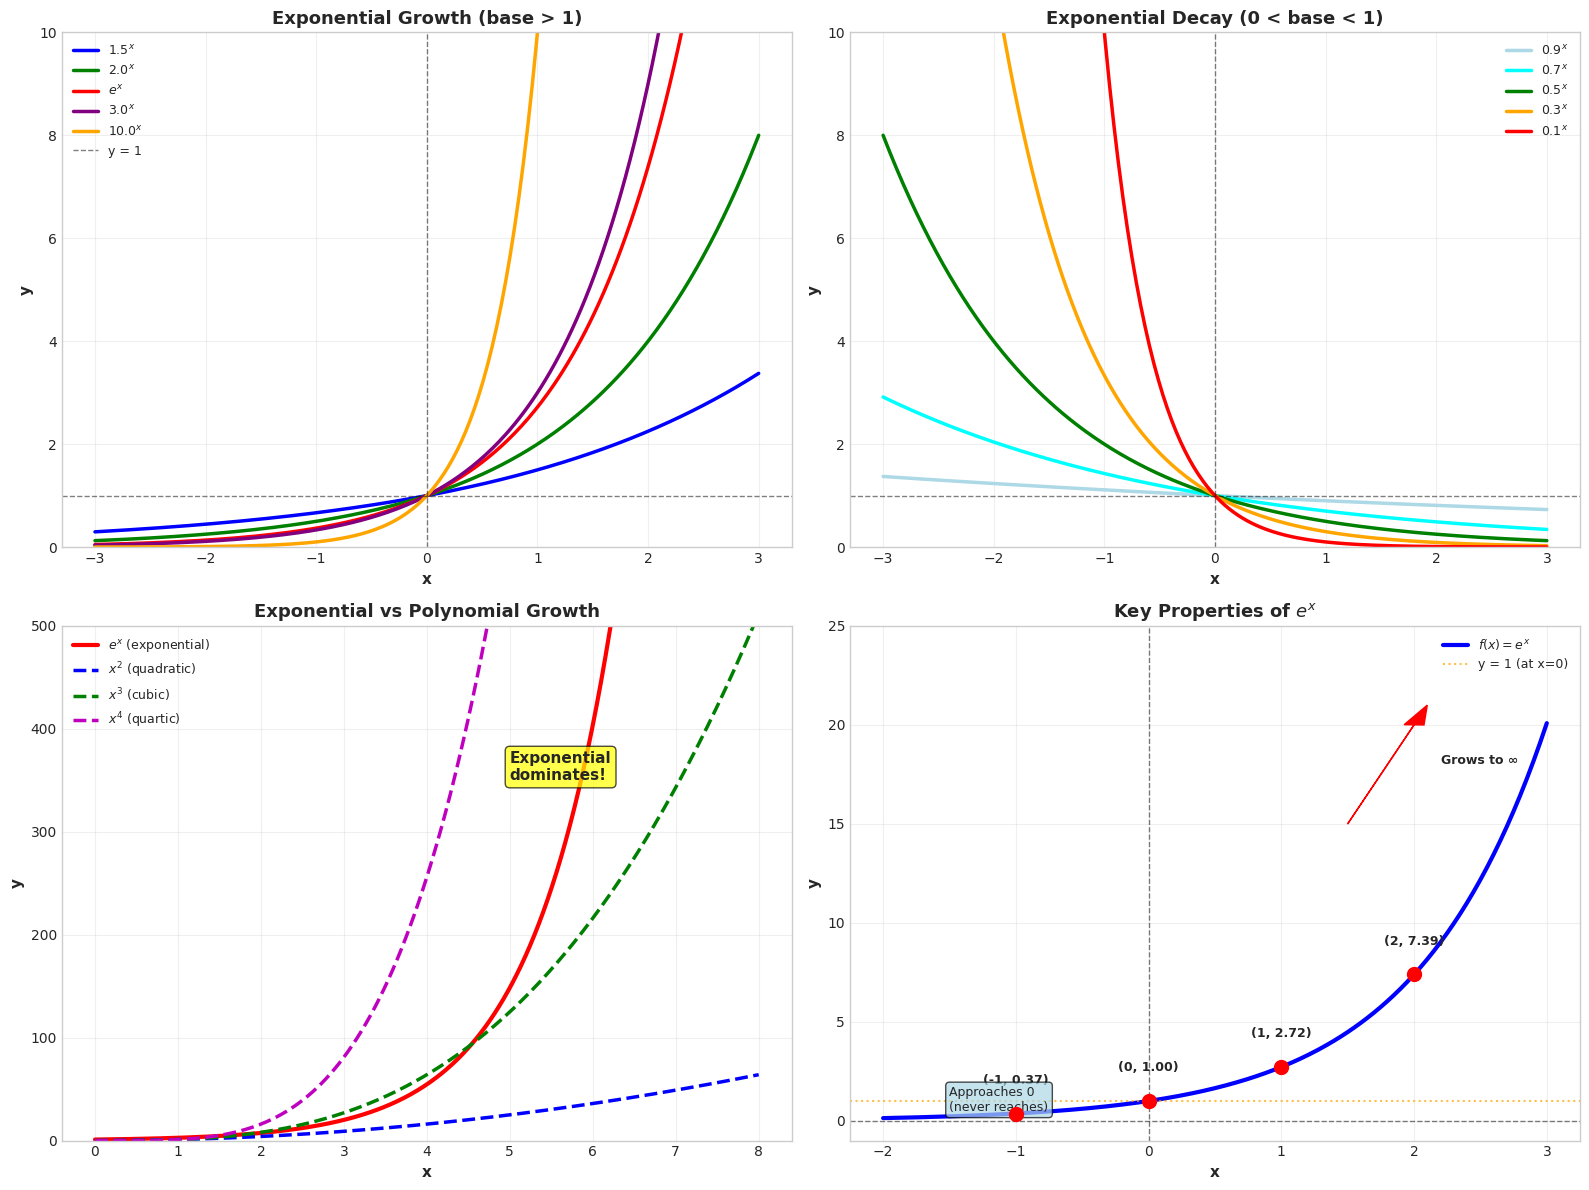

In [ ]:
# Visualization: Exponential Functions with Different Bases
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

x_vals = np.linspace(-3, 3, 300)

# Plot 1: Different bases > 1
ax1 = axes[0, 0]
bases_growth = [1.5, 2, np.e, 3, 10]
colors = ['blue', 'green', 'red', 'purple', 'orange']

for base, color in zip(bases_growth, colors):
    y = base**x_vals
    label = f'$e^x$' if base == np.e else f'${base:.1f}^x$'
    ax1.plot(x_vals, y, color=color, linewidth=2.5, label=label)

ax1.axhline(y=1, color='k', linewidth=1, linestyle='--', alpha=0.5, label='y = 1')
ax1.axvline(x=0, color='k', linewidth=1, linestyle='--', alpha=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=11, fontweight='bold')
ax1.set_ylabel('y', fontsize=11, fontweight='bold')
ax1.set_title('Exponential Growth (base > 1)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9, loc='upper left')
ax1.set_ylim(0, 10)

# Plot 2: Decay (0 < base < 1)
ax2 = axes[0, 1]
bases_decay = [0.9, 0.7, 0.5, 0.3, 0.1]
colors_decay = ['lightblue', 'cyan', 'green', 'orange', 'red']

for base, color in zip(bases_decay, colors_decay):
    y = base**x_vals
    ax2.plot(x_vals, y, color=color, linewidth=2.5, label=f'${base}^x$')

ax2.axhline(y=1, color='k', linewidth=1, linestyle='--', alpha=0.5)
ax2.axvline(x=0, color='k', linewidth=1, linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=11, fontweight='bold')
ax2.set_ylabel('y', fontsize=11, fontweight='bold')
ax2.set_title('Exponential Decay (0 < base < 1)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9, loc='upper right')
ax2.set_ylim(0, 10)

# Plot 3: e^x vs Polynomials
ax3 = axes[1, 0]
x_compare = np.linspace(0, 8, 300)

ax3.plot(x_compare, np.exp(x_compare), 'r-', linewidth=3, label='$e^x$ (exponential)')
ax3.plot(x_compare, x_compare**2, 'b--', linewidth=2.5, label='$x^2$ (quadratic)')
ax3.plot(x_compare, x_compare**3, 'g--', linewidth=2.5, label='$x^3$ (cubic)')
ax3.plot(x_compare, x_compare**4, 'm--', linewidth=2.5, label='$x^4$ (quartic)')

ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=11, fontweight='bold')
ax3.set_ylabel('y', fontsize=11, fontweight='bold')
ax3.set_title('Exponential vs Polynomial Growth', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)
ax3.set_ylim(0, 500)
ax3.text(5, 350, 'Exponential\ndominates!', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Plot 4: Properties of e^x
ax4 = axes[1, 1]
x_prop = np.linspace(-2, 3, 300)
y_exp = np.exp(x_prop)

ax4.plot(x_prop, y_exp, 'b-', linewidth=3, label='$f(x) = e^x$')

# Mark special points
special_points = [(-1, np.exp(-1)), (0, 1), (1, np.e), (2, np.exp(2))]
for xp, yp in special_points:
    ax4.plot(xp, yp, 'ro', markersize=10, zorder=5)
    ax4.text(xp, yp + 1.5, f'({xp}, {yp:.2f})', ha='center', fontsize=9, fontweight='bold')

# Annotations
ax4.axhline(y=0, color='k', linewidth=1, linestyle='--', alpha=0.5)
ax4.axhline(y=1, color='orange', linewidth=1.5, linestyle=':', alpha=0.7, label='y = 1 (at x=0)')
ax4.axvline(x=0, color='k', linewidth=1, linestyle='--', alpha=0.5)

# Asymptote annotation
ax4.text(-1.5, 0.5, 'Approaches 0\n(never reaches)', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
ax4.arrow(1.5, 15, 0.5, 5, head_width=0.15, head_length=1, fc='red', ec='red')
ax4.text(2.2, 18, 'Grows to ∞', fontsize=9, fontweight='bold')

ax4.grid(True, alpha=0.3)
ax4.set_xlabel('x', fontsize=11, fontweight='bold')
ax4.set_ylabel('y', fontsize=11, fontweight='bold')
ax4.set_title('Key Properties of $e^x$', fontsize=13, fontweight='bold')
ax4.legend(fontsize=9)
ax4.set_ylim(-1, 25)

plt.tight_layout()
plt.show()

In [ ]:
# Demonstrating Exponential Dominance
print("\n3. EXPONENTIAL DOMINANCE OVER POLYNOMIALS")
print("-" * 50)

x_test = [5, 10, 20, 50]
print(f"\n{'x':>5} | {'e^x':>15} | {'x^2':>12} | {'x^5':>15} | {'x^10':>18}")
print("-" * 70)
for x_val in x_test:
    exp_val = np.exp(x_val)
    poly2 = x_val**2
    poly5 = x_val**5
    poly10 = x_val**10
    print(f"{x_val:5d} | {exp_val:15.2e} | {poly2:12.2e} | {poly5:15.2e} | {poly10:18.2e}")

print("\n   For x = 50:")
print(f"   e^50 / 50^10 = {np.exp(50) / 50**10:.2e} (exponential is MUCH larger)")


3. EXPONENTIAL DOMINANCE OVER POLYNOMIALS
--------------------------------------------------

    x |             e^x |          x^2 |             x^5 |               x^10
----------------------------------------------------------------------
    5 |        1.48e+02 |     2.50e+01 |        3.12e+03 |           9.77e+06
   10 |        2.20e+04 |     1.00e+02 |        1.00e+05 |           1.00e+10
   20 |        4.85e+08 |     4.00e+02 |        3.20e+06 |           1.02e+13
   50 |        5.18e+21 |     2.50e+03 |        3.12e+08 |           9.77e+16

   For x = 50:
   e^50 / 50^10 = 5.31e+04 (exponential is MUCH larger)


In [ ]:
# Data Science Application: Softmax Function
print("\n4. DATA SCIENCE: SOFTMAX FUNCTION")
print("-" * 50)

# Logits (raw model outputs)
logits = np.array([2.0, 1.0, 0.1, -1.0])
print(f"\n   Logits (raw scores): {logits}")

# Softmax calculation
exp_logits = np.exp(logits)
softmax = exp_logits / np.sum(exp_logits)

print(f"\n   Exponentials: {exp_logits}")
print(f"   Sum of exponentials: {np.sum(exp_logits):.4f}")
print(f"\n   Softmax probabilities: {softmax}")
print(f"   Sum of probabilities: {np.sum(softmax):.6f} (should be 1.0)")


4. DATA SCIENCE: SOFTMAX FUNCTION
--------------------------------------------------

   Logits (raw scores): [ 2.   1.   0.1 -1. ]

   Exponentials: [7.3890561  2.71828183 1.10517092 0.36787944]
   Sum of exponentials: 11.5804

   Softmax probabilities: [0.63806635 0.23473149 0.0954347  0.03176745]
   Sum of probabilities: 1.000000 (should be 1.0)


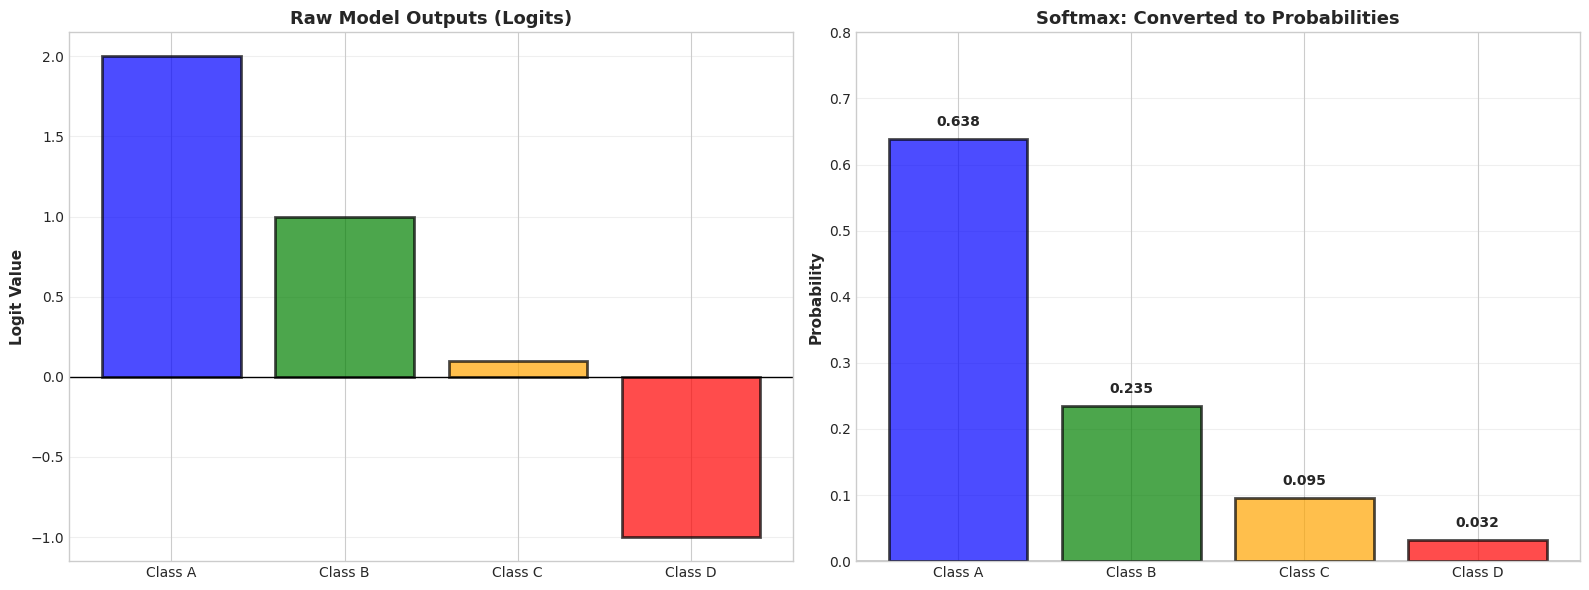


🎯 Key Insight: Softmax uses exponential function to convert
   raw scores into valid probability distribution!


In [ ]:
# Visualize softmax
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

classes = ['Class A', 'Class B', 'Class C', 'Class D']

# Plot 1: Raw logits
ax1.bar(classes, logits, color=['blue', 'green', 'orange', 'red'], 
       edgecolor='black', linewidth=2, alpha=0.7)
ax1.axhline(y=0, color='k', linewidth=1)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylabel('Logit Value', fontsize=11, fontweight='bold')
ax1.set_title('Raw Model Outputs (Logits)', fontsize=13, fontweight='bold')

# Plot 2: Softmax probabilities
ax2.bar(classes, softmax, color=['blue', 'green', 'orange', 'red'], 
       edgecolor='black', linewidth=2, alpha=0.7)
for i, (cls, prob) in enumerate(zip(classes, softmax)):
    ax2.text(i, prob + 0.02, f'{prob:.3f}', ha='center', fontsize=10, fontweight='bold')
ax2.axhline(y=0, color='k', linewidth=1)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylabel('Probability', fontsize=11, fontweight='bold')
ax2.set_title('Softmax: Converted to Probabilities', fontsize=13, fontweight='bold')
ax2.set_ylim(0, 0.8)

plt.tight_layout()
plt.show()

print("\n🎯 Key Insight: Softmax uses exponential function to convert")
print("   raw scores into valid probability distribution!")

## 2. Exponential Growth and Decay

### **General Exponential Model**

$$N(t) = N_0 e^{kt}$$

where:
- $N(t)$: Quantity at time $t$
- $N_0$: Initial quantity at $t = 0$
- $k$: Growth/decay rate constant
- $t$: Time
- $e$: Euler's number

**Sign of $k$ determines behavior**:
- $k > 0$: **Exponential growth** (increases over time)
- $k < 0$: **Exponential decay** (decreases over time)

---

### **Exponential Growth ($k > 0$)**

**Model**: $N(t) = N_0 e^{kt}$ with $k > 0$

**Characteristics**:
- Starts at $N_0$ when $t = 0$
- Increases without bound as $t \to \infty$
- Rate of growth proportional to current amount
- **Doubling time**: Time for quantity to double

**Doubling Time Formula**:
$$T_{\text{double}} = \frac{\ln(2)}{k} \approx \frac{0.693}{k}$$

**Applications**:
- Population growth (bacteria, animals, humans)
- Viral spread (epidemiology)
- Compound interest (continuous)
- Social media followers
- Radioactive production (rare isotopes)

---

### **Exponential Decay ($k < 0$)**

**Model**: $N(t) = N_0 e^{-\lambda t}$ where $\lambda = |k| > 0$

**Characteristics**:
- Starts at $N_0$ when $t = 0$
- Approaches 0 as $t \to \infty$ (never reaches zero)
- Rate of decay proportional to current amount
- **Half-life**: Time for quantity to reduce by half

**Half-Life Formula**:
$$T_{1/2} = \frac{\ln(2)}{\lambda} \approx \frac{0.693}{\lambda}$$

**Applications**:
- Radioactive decay (Carbon-14 dating)
- Drug elimination from body (pharmacokinetics)
- Atmospheric pressure with altitude
- Capacitor discharge
- Depreciation of assets

---

### **Key Formulas**

| **Concept** | **Formula** | **Meaning** |
|-------------|-------------|-------------|
| General model | $N(t) = N_0 e^{kt}$ | Exponential change |
| Growth rate | $\frac{dN}{dt} = kN$ | Rate proportional to amount |
| Doubling time | $T_d = \frac{\ln 2}{k}$ | Time to double |
| Half-life | $T_{1/2} = \frac{\ln 2}{\lambda}$ | Time to halve |
| Time to reach $N$ | $t = \frac{1}{k}\ln\left(\frac{N}{N_0}\right)$ | Solve for time |

---

### **Solving Exponential Growth/Decay Problems**

**Given**: Initial amount $N_0$, rate $k$, want $N(t)$ at time $t$

**Step 1**: Identify whether growth ($k > 0$) or decay ($k < 0$)

**Step 2**: Use $N(t) = N_0 e^{kt}$

**Step 3**: Calculate using known values

**Example (Growth)**:
- Initial bacteria: 100
- Growth rate: $k = 0.3$ per hour
- After 5 hours: $N(5) = 100 e^{0.3 \times 5} = 100 e^{1.5} \approx 448$ bacteria

**Example (Decay)**:
- Initial radioactive atoms: 1000
- Decay constant: $\lambda = 0.05$ per year
- After 10 years: $N(10) = 1000 e^{-0.05 \times 10} = 1000 e^{-0.5} \approx 607$ atoms

---

### **Relationship to Continuous Compounding**

Exponential growth model is equivalent to **continuous compounding** in finance:

$$A(t) = P e^{rt}$$

where:
- $A(t)$: Amount after time $t$
- $P$: Principal (initial investment)
- $r$: Annual interest rate (decimal)
- $t$: Time in years

**Connection**: This is exactly $N(t) = N_0 e^{kt}$ with $N_0 = P$ and $k = r$

---

### **Comparing Growth Models**

| **Model** | **Formula** | **Growth Type** | **Example** |
|-----------|-------------|-----------------|-------------|
| Linear | $N(t) = N_0 + kt$ | Constant amount added | Saving $100/month |
| Exponential | $N(t) = N_0 e^{kt}$ | Constant percentage growth | Population, interest |
| Logistic | $N(t) = \frac{K}{1 + Ae^{-kt}}$ | Bounded growth (carrying capacity) | Real populations |
| Power | $N(t) = N_0 t^k$ | Polynomial growth | Certain physical processes |

---

### **Rule of 70 (Approximation)**

For small growth rates $r$ (as percentage):

$$\text{Doubling time} \approx \frac{70}{r}$$

**Example**: At 7% annual growth, doubling time $\approx \frac{70}{7} = 10$ years

**Exact**: $T_d = \frac{\ln 2}{0.07} \approx 9.9$ years ✓

---

### **Data Science Applications**

1. **Machine Learning**:
   - **Learning rate schedules**: Exponential decay of learning rate
   - **Weight decay**: Regularization with exponential penalty
   - **Gradient descent**: Momentum uses exponential moving averages

2. **Time Series Analysis**:
   - **Exponential smoothing**: $S_t = \alpha y_t + (1-\alpha)S_{t-1}$
   - **Trend detection**: Identify exponential growth/decay patterns
   - **Forecasting**: Extrapolate exponential trends

3. **Epidemiology (COVID-19)**:
   - **SIR models**: Infected population grows exponentially initially
   - **R₀ (Basic reproduction number)**: Determines growth rate
   - **Doubling time**: Track pandemic spread

4. **A/B Testing**:
   - **User growth**: Model user acquisition exponentially
   - **Conversion rates**: Cumulative conversions over time

5. **Natural Language Processing**:
   - **TF-IDF**: Inverse document frequency uses logarithms (inverse of exponential)
   - **Perplexity**: Measures exponential of cross-entropy

---

### **Common Pitfalls**

⚠️ **Never reaches zero**: Decay approaches but never hits 0  
⚠️ **Infinite growth unrealistic**: Real systems have limits (logistic model better)  
⚠️ **Units matter**: Ensure $k$ and $t$ have compatible units  
⚠️ **Initial condition**: Always need $N_0$ to solve  
⚠️ **Negative time**: Model may not apply for $t < 0$

In [ ]:
# Exponential Growth and Decay

print("=" * 70)
print("EXPONENTIAL GROWTH AND DECAY")
print("=" * 70)

# Example 1: Bacterial Growth
print("\n1. BACTERIAL GROWTH")
print("-" * 50)

N0_bacteria = 100  # Initial bacteria count
k_growth = 0.3      # Growth rate (30% per hour)
time_hours = np.linspace(0, 10, 100)

N_bacteria = N0_bacteria * np.exp(k_growth * time_hours)

# Doubling time
T_double = np.log(2) / k_growth
print(f"\n   Initial bacteria: {N0_bacteria}")
print(f"   Growth rate: k = {k_growth} per hour")
print(f"   Doubling time: {T_double:.2f} hours")
print(f"\n   After 5 hours: {N0_bacteria * np.exp(k_growth * 5):.0f} bacteria")
print(f"   After 10 hours: {N0_bacteria * np.exp(k_growth * 10):.0f} bacteria")

# Example 2: Radioactive Decay
print("\n2. RADIOACTIVE DECAY (Carbon-14)")
print("-" * 50)

N0_atoms = 1000     # Initial atoms
half_life = 5730    # Carbon-14 half-life in years
lambda_decay = np.log(2) / half_life  # Decay constant

print(f"\n   Initial atoms: {N0_atoms}")
print(f"   Half-life: {half_life} years")
print(f"   Decay constant: λ = {lambda_decay:.6f} per year")

times_years = [1000, 5730, 11460, 17190]
print(f"\n   {'Time (years)':>15} | {'Atoms Remaining':>18} | {'% Remaining':>12}")
print("   " + "-" * 50)
for t_year in times_years:
    N_t = N0_atoms * np.exp(-lambda_decay * t_year)
    percent = (N_t / N0_atoms) * 100
    print(f"   {t_year:15d} | {N_t:18.2f} | {percent:11.2f}%")

EXPONENTIAL GROWTH AND DECAY

1. BACTERIAL GROWTH
--------------------------------------------------

   Initial bacteria: 100
   Growth rate: k = 0.3 per hour
   Doubling time: 2.31 hours

   After 5 hours: 448 bacteria
   After 10 hours: 2009 bacteria

2. RADIOACTIVE DECAY (Carbon-14)
--------------------------------------------------

   Initial atoms: 1000
   Half-life: 5730 years
   Decay constant: λ = 0.000121 per year

      Time (years) |    Atoms Remaining |  % Remaining
   --------------------------------------------------
              1000 |             886.06 |       88.61%
              5730 |             500.00 |       50.00%
             11460 |             250.00 |       25.00%
             17190 |             125.00 |       12.50%


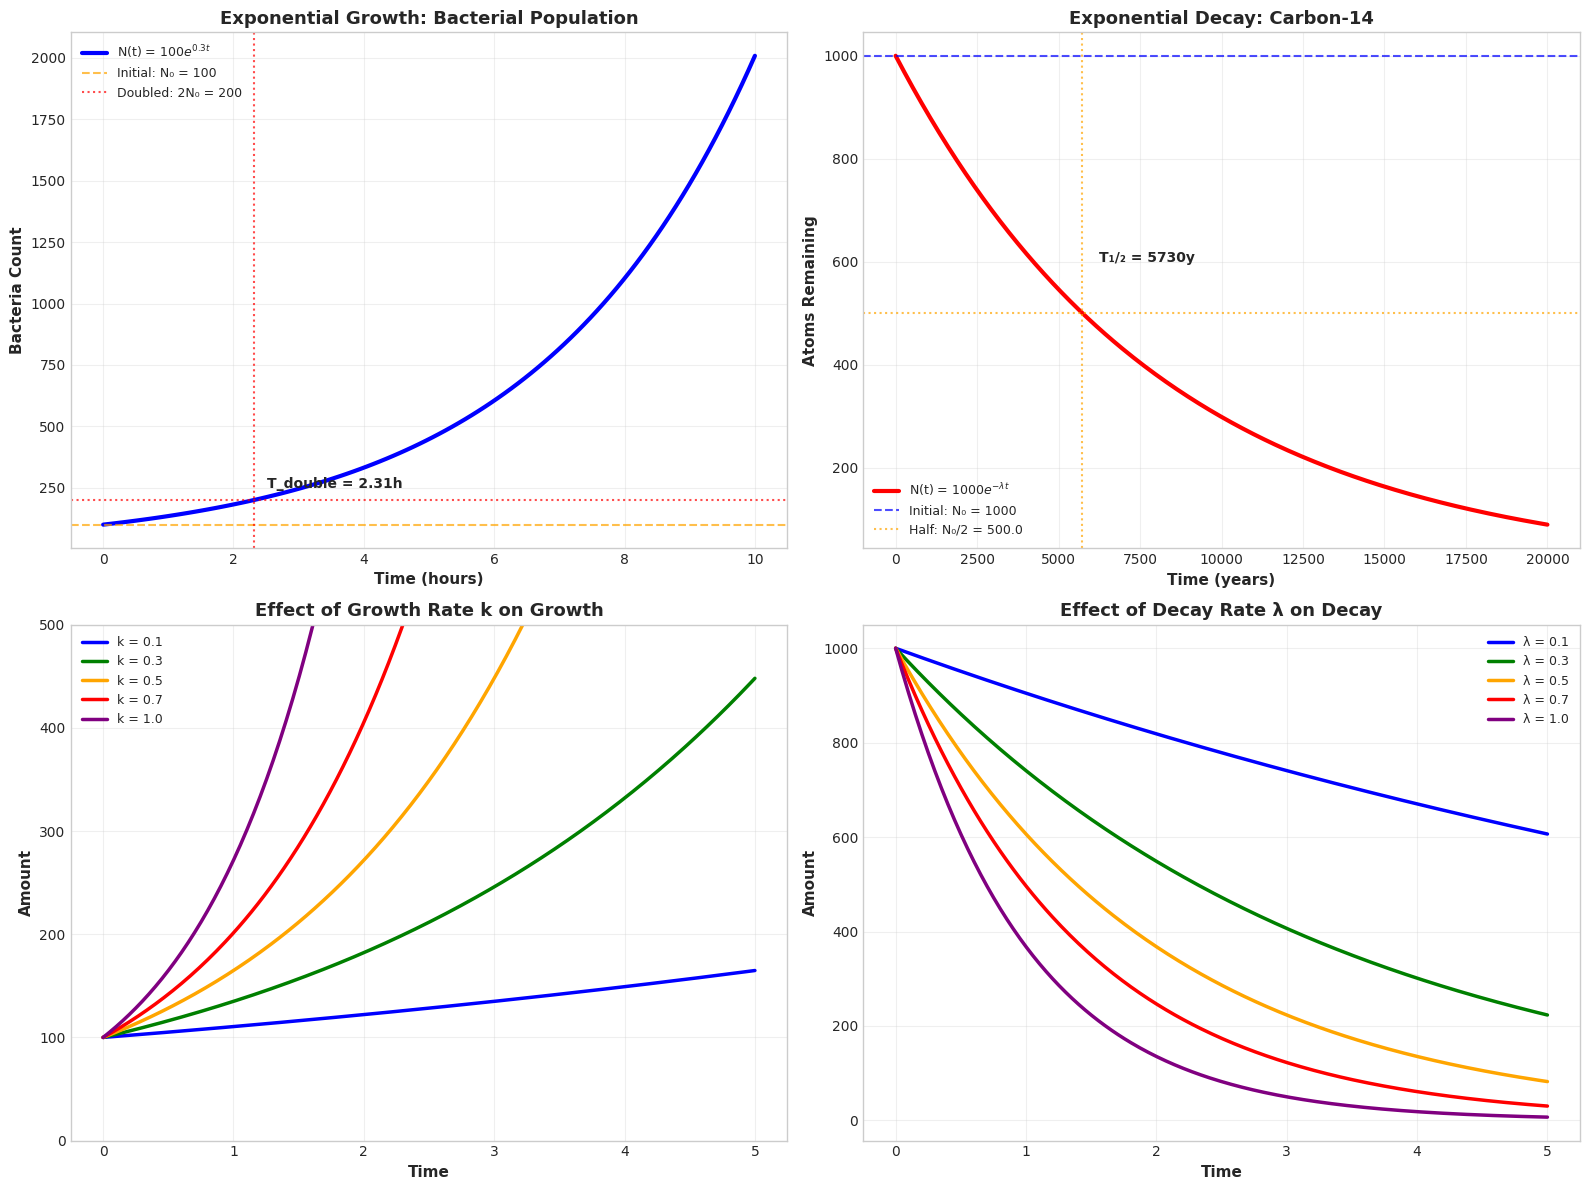

In [ ]:
# Visualization: Growth vs Decay
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Bacterial Growth
ax1 = axes[0, 0]
ax1.plot(time_hours, N_bacteria, 'b-', linewidth=3, label=f'N(t) = {N0_bacteria}$e^{{{k_growth}t}}$')
ax1.axhline(y=N0_bacteria, color='orange', linewidth=1.5, linestyle='--', alpha=0.7,
           label=f'Initial: N₀ = {N0_bacteria}')
ax1.axhline(y=2*N0_bacteria, color='red', linewidth=1.5, linestyle=':', alpha=0.7,
           label=f'Doubled: 2N₀ = {2*N0_bacteria}')
ax1.axvline(x=T_double, color='red', linewidth=1.5, linestyle=':', alpha=0.7)
ax1.text(T_double + 0.2, 250, f'T_double = {T_double:.2f}h', fontsize=10, fontweight='bold')

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Time (hours)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Bacteria Count', fontsize=11, fontweight='bold')
ax1.set_title('Exponential Growth: Bacterial Population', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)

# Plot 2: Radioactive Decay
ax2 = axes[0, 1]
t_decay = np.linspace(0, 20000, 300)
N_decay = N0_atoms * np.exp(-lambda_decay * t_decay)

ax2.plot(t_decay, N_decay, 'r-', linewidth=3, label=f'N(t) = {N0_atoms}$e^{{-λt}}$')
ax2.axhline(y=N0_atoms, color='blue', linewidth=1.5, linestyle='--', alpha=0.7,
           label=f'Initial: N₀ = {N0_atoms}')
ax2.axhline(y=N0_atoms/2, color='orange', linewidth=1.5, linestyle=':', alpha=0.7,
           label=f'Half: N₀/2 = {N0_atoms/2}')
ax2.axvline(x=half_life, color='orange', linewidth=1.5, linestyle=':', alpha=0.7)
ax2.text(half_life + 500, 600, f'T₁/₂ = {half_life}y', fontsize=10, fontweight='bold')

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Time (years)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Atoms Remaining', fontsize=11, fontweight='bold')
ax2.set_title('Exponential Decay: Carbon-14', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)

# Plot 3: Multiple Growth Rates
ax3 = axes[1, 0]
t_compare = np.linspace(0, 5, 300)
growth_rates = [0.1, 0.3, 0.5, 0.7, 1.0]
colors_growth = ['blue', 'green', 'orange', 'red', 'purple']

for k, color in zip(growth_rates, colors_growth):
    N_t = 100 * np.exp(k * t_compare)
    ax3.plot(t_compare, N_t, color=color, linewidth=2.5, label=f'k = {k}')

ax3.grid(True, alpha=0.3)
ax3.set_xlabel('Time', fontsize=11, fontweight='bold')
ax3.set_ylabel('Amount', fontsize=11, fontweight='bold')
ax3.set_title('Effect of Growth Rate k on Growth', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)
ax3.set_ylim(0, 500)

# Plot 4: Multiple Decay Rates
ax4 = axes[1, 1]
decay_rates = [0.1, 0.3, 0.5, 0.7, 1.0]
colors_decay = ['blue', 'green', 'orange', 'red', 'purple']

for lam, color in zip(decay_rates, colors_decay):
    N_t = 1000 * np.exp(-lam * t_compare)
    ax4.plot(t_compare, N_t, color=color, linewidth=2.5, label=f'λ = {lam}')

ax4.grid(True, alpha=0.3)
ax4.set_xlabel('Time', fontsize=11, fontweight='bold')
ax4.set_ylabel('Amount', fontsize=11, fontweight='bold')
ax4.set_title('Effect of Decay Rate λ on Decay', fontsize=13, fontweight='bold')
ax4.legend(fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Real-World Application: COVID-19 Spread
print("\n" + "="*70)
print("APPLICATION: COVID-19 EXPONENTIAL SPREAD")
print("="*70)

# Parameters for early pandemic (pre-intervention)
R0 = 2.5  # Basic reproduction number
generation_time = 5  # days
k_covid = np.log(R0) / generation_time
T_double_covid = np.log(2) / k_covid

print(f"\nEpidemiological Parameters:")
print(f"  • Basic Reproduction Number R₀: {R0}")
print(f"  • Generation Time: {generation_time} days")
print(f"  • Growth Rate k: {k_covid:.4f} per day")
print(f"  • Doubling Time: {T_double_covid:.2f} days")

# Predict spread
initial_cases = 100
days = np.array([0, 7, 14, 21, 28])
projected_cases = initial_cases * np.exp(k_covid * days)

print(f"\nProjected Case Growth (starting from {initial_cases} cases):")
print("  Day | Cases")
print("  " + "-"*25)
for day, cases in zip(days, projected_cases):
    print(f"  {day:3d} | {cases:,.0f}")

print(f"\n💡 This shows why early intervention is critical!")
print(f"   Without intervention, cases can grow from {initial_cases} to {projected_cases[-1]:,.0f}")
print(f"   in just {days[-1]} days (a {projected_cases[-1]/initial_cases:.0f}x increase).")


APPLICATION: COVID-19 EXPONENTIAL SPREAD

Epidemiological Parameters:
  • Basic Reproduction Number R₀: 2.5
  • Generation Time: 5 days
  • Growth Rate k: 0.1833 per day
  • Doubling Time: 3.78 days

Projected Case Growth (starting from 100 cases):
  Day | Cases
  -------------------------
    0 | 100
    7 | 361
   14 | 1,301
   21 | 4,692
   28 | 16,922

💡 This shows why early intervention is critical!
   Without intervention, cases can grow from 100 to 16,922
   in just 28 days (a 169x increase).


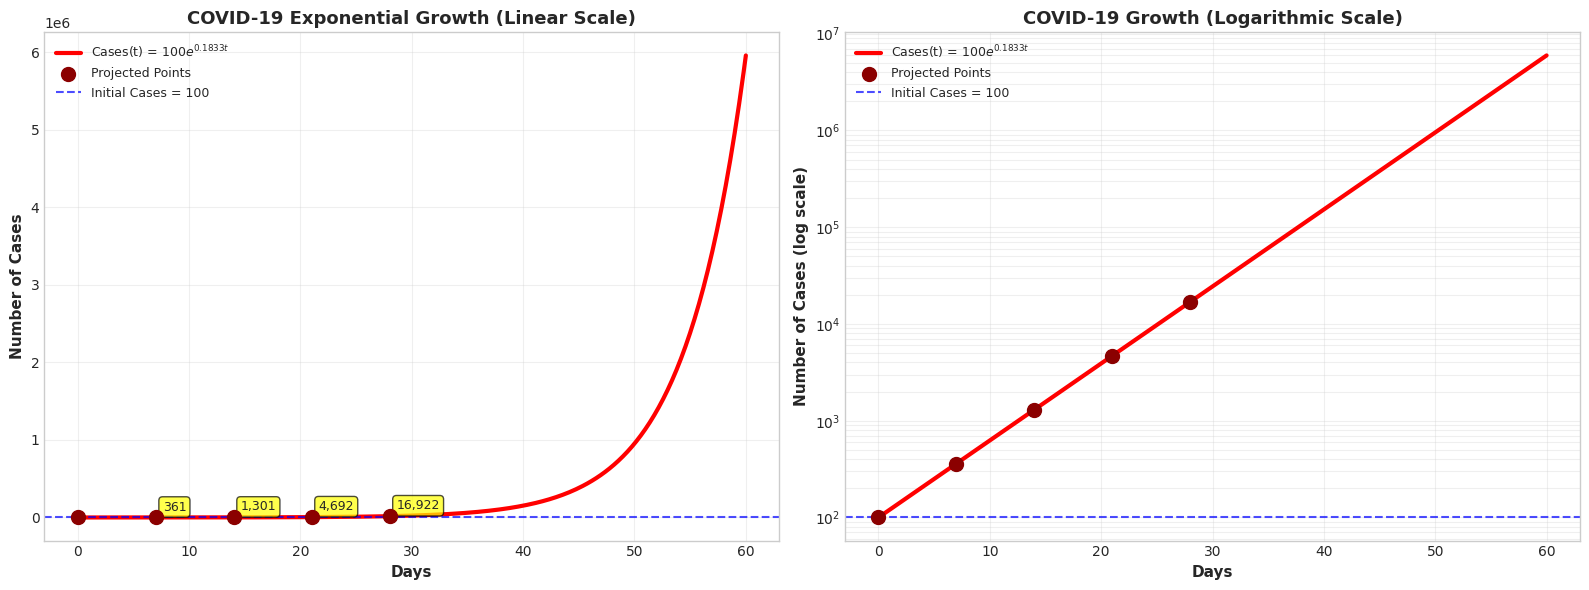

📊 Note: On a log scale, exponential growth appears as a straight line!
   This is useful for detecting exponential growth in real data.


In [ ]:
# Visualization: COVID-19 Spread
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Extended timeline for visualization
t_days = np.linspace(0, 60, 300)
cases = initial_cases * np.exp(k_covid * t_days)

# Linear scale
ax1 = axes[0]
ax1.plot(t_days, cases, 'r-', linewidth=3, label=f'Cases(t) = {initial_cases}$e^{{{k_covid:.4f}t}}$')
ax1.scatter(days, projected_cases, color='darkred', s=100, zorder=5, label='Projected Points')
ax1.axhline(y=initial_cases, color='blue', linewidth=1.5, linestyle='--', alpha=0.7,
           label=f'Initial Cases = {initial_cases}')

for day, case_count in zip(days[1:], projected_cases[1:]):
    ax1.annotate(f'{case_count:,.0f}', 
                xy=(day, case_count), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Days', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Cases', fontsize=11, fontweight='bold')
ax1.set_title('COVID-19 Exponential Growth (Linear Scale)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)

# Logarithmic scale (shows exponential as straight line)
ax2 = axes[1]
ax2.semilogy(t_days, cases, 'r-', linewidth=3, label=f'Cases(t) = {initial_cases}$e^{{{k_covid:.4f}t}}$')
ax2.scatter(days, projected_cases, color='darkred', s=100, zorder=5, label='Projected Points')
ax2.axhline(y=initial_cases, color='blue', linewidth=1.5, linestyle='--', alpha=0.7,
           label=f'Initial Cases = {initial_cases}')

ax2.grid(True, alpha=0.3, which='both')
ax2.set_xlabel('Days', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Cases (log scale)', fontsize=11, fontweight='bold')
ax2.set_title('COVID-19 Growth (Logarithmic Scale)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)

plt.tight_layout()
plt.show()

print("📊 Note: On a log scale, exponential growth appears as a straight line!")
print("   This is useful for detecting exponential growth in real data.")

In [ ]:
# Machine Learning Application: Learning Rate Decay
print("\n" + "="*70)
print("APPLICATION: EXPONENTIAL LEARNING RATE DECAY")
print("="*70)

# Parameters
initial_lr = 0.1
decay_rate = 0.95
epochs = np.arange(0, 51, 5)
learning_rates = initial_lr * (decay_rate ** epochs)

print(f"\nLearning Rate Schedule:")
print(f"  • Initial Learning Rate: {initial_lr}")
print(f"  • Decay Rate: {decay_rate} (multiplied each epoch)")
print(f"  • Formula: lr(t) = {initial_lr} × {decay_rate}^t")
print("\n  Epoch | Learning Rate")
print("  " + "-"*30)
for epoch, lr in zip(epochs, learning_rates):
    print(f"  {epoch:5d} | {lr:.6f}")

print(f"\n💡 Learning rate decays from {initial_lr} to {learning_rates[-1]:.6f}")
print(f"   This helps the model converge smoothly during training.")


APPLICATION: EXPONENTIAL LEARNING RATE DECAY

Learning Rate Schedule:
  • Initial Learning Rate: 0.1
  • Decay Rate: 0.95 (multiplied each epoch)
  • Formula: lr(t) = 0.1 × 0.95^t

  Epoch | Learning Rate
  ------------------------------
      0 | 0.100000
      5 | 0.077378
     10 | 0.059874
     15 | 0.046329
     20 | 0.035849
     25 | 0.027739
     30 | 0.021464
     35 | 0.016608
     40 | 0.012851
     45 | 0.009944
     50 | 0.007694

💡 Learning rate decays from 0.1 to 0.007694
   This helps the model converge smoothly during training.


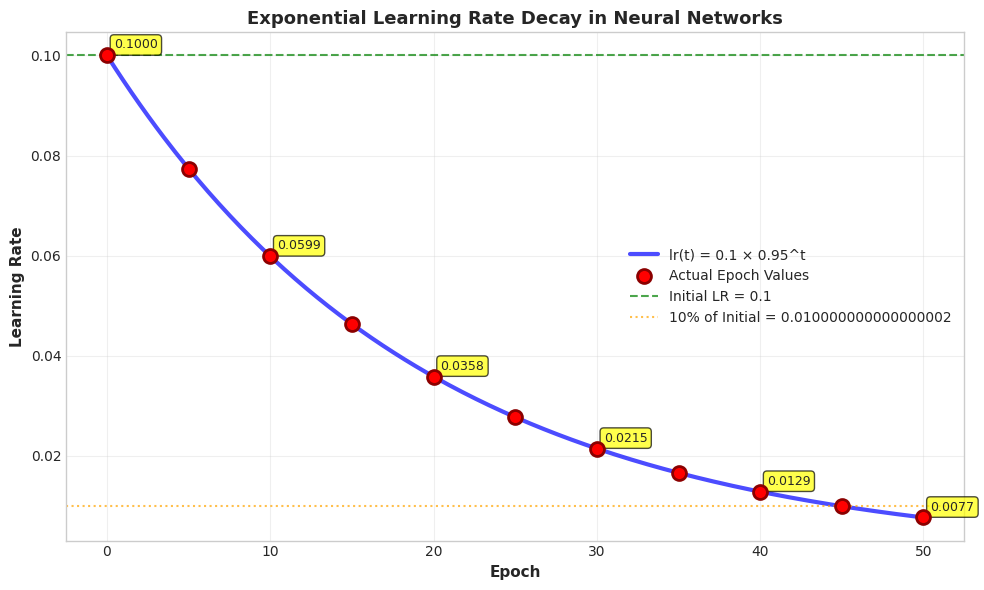

📊 Exponential decay smoothly reduces learning rate over training!
   This is a common technique in deep learning optimization.


In [ ]:
# Visualization: Learning Rate Decay
fig, ax = plt.subplots(figsize=(10, 6))

# Continuous curve
epochs_continuous = np.linspace(0, 50, 300)
lr_continuous = initial_lr * (decay_rate ** epochs_continuous)

ax.plot(epochs_continuous, lr_continuous, 'b-', linewidth=3, 
        label=f'lr(t) = {initial_lr} × {decay_rate}^t', alpha=0.7)
ax.scatter(epochs, learning_rates, color='red', s=100, zorder=5, 
          label='Actual Epoch Values', edgecolors='darkred', linewidths=2)

# Annotate key points
for i, (epoch, lr) in enumerate(zip(epochs[::2], learning_rates[::2])):
    ax.annotate(f'{lr:.4f}', 
                xy=(epoch, lr), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax.axhline(y=initial_lr, color='green', linewidth=1.5, linestyle='--', alpha=0.7,
          label=f'Initial LR = {initial_lr}')
ax.axhline(y=initial_lr * 0.1, color='orange', linewidth=1.5, linestyle=':', alpha=0.7,
          label=f'10% of Initial = {initial_lr * 0.1}')

ax.grid(True, alpha=0.3)
ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax.set_ylabel('Learning Rate', fontsize=11, fontweight='bold')
ax.set_title('Exponential Learning Rate Decay in Neural Networks', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

print("📊 Exponential decay smoothly reduces learning rate over training!")
print("   This is a common technique in deep learning optimization.")

## 3. Inverse Functions and Logarithms

### **Definition: Inverse Function**

Given a function $f: A \to B$, its **inverse function** $f^{-1}: B \to A$ satisfies:

$$f^{-1}(f(x)) = x \text{ for all } x \in A$$
$$f(f^{-1}(y)) = y \text{ for all } y \in B$$

**Graphical Property**: The graph of $f^{-1}$ is the reflection of $f$ across the line $y = x$.

---

### **The Natural Logarithm (Inverse of $e^x$)**

The **natural logarithm** $\ln(x)$ is the inverse of the exponential function $e^x$:

$$y = \ln(x) \Leftrightarrow x = e^y$$

**Key Relationships**:
$$\begin{aligned}
\ln(e^x) &= x \text{ for all } x \in \mathbb{R} \\
e^{\ln(x)} &= x \text{ for all } x > 0
\end{aligned}$$

---

### **Properties of Logarithms**

#### **1. Domain and Range**
- **Domain**: $(0, \infty)$ — only positive numbers
- **Range**: $(-\infty, \infty)$ — all real numbers

#### **2. Logarithm Laws**

$$\begin{aligned}
\ln(ab) &= \ln(a) + \ln(b) & \text{(Product rule)} \\
\ln\left(\frac{a}{b}\right) &= \ln(a) - \ln(b) & \text{(Quotient rule)} \\
\ln(a^b) &= b\ln(a) & \text{(Power rule)} \\
\ln(1) &= 0 & \text{(Log of 1)} \\
\ln(e) &= 1 & \text{(Log of base)} \\
\ln\left(\frac{1}{a}\right) &= -\ln(a) & \text{(Reciprocal)}
\end{aligned}$$

#### **3. Special Values**

$$\begin{aligned}
\ln(1) &= 0 \\
\ln(e) &= 1 \\
\ln(e^2) &= 2 \\
\ln\left(\frac{1}{e}\right) &= -1 \\
\ln(0.5) &\approx -0.693 \\
\ln(2) &\approx 0.693
\end{aligned}$$

#### **4. Monotonicity**
- **Strictly increasing**: If $x_1 < x_2$, then $\ln(x_1) < \ln(x_2)$
- Grows without bound: $\lim_{x \to \infty} \ln(x) = \infty$
- Approaches $-\infty$: $\lim_{x \to 0^+} \ln(x) = -\infty$

---

### **Inverse Function Theorem**

**Theorem**: If $f$ is continuous and strictly monotonic on an interval, then:
1. $f$ has an inverse function $f^{-1}$
2. $f^{-1}$ is also continuous and strictly monotonic
3. The derivative of the inverse satisfies:

$$(f^{-1})'(y) = \frac{1}{f'(x)} \text{ where } y = f(x)$$

**For Exponential and Logarithm**:
$$\begin{aligned}
\frac{d}{dx}(e^x) &= e^x \\
\frac{d}{dx}(\ln x) &= \frac{1}{x}
\end{aligned}$$

**Verification**:
$$(f^{-1})'(e^x) = \frac{1}{e^x} = \frac{1}{x} \text{ where } x = \ln(e^x)$$ ✓

---

### **Change of Base Formula**

Convert between different logarithm bases:

$$\log_b(x) = \frac{\ln(x)}{\ln(b)} = \frac{\log(x)}{\log(b)}$$

**Examples**:
$$\begin{aligned}
\log_2(8) &= \frac{\ln(8)}{\ln(2)} = \frac{2.079}{0.693} = 3 \\
\log_{10}(100) &= \frac{\ln(100)}{\ln(10)} = \frac{4.605}{2.303} = 2
\end{aligned}$$

---

### **Solving Exponential Equations**

**Strategy**: Take logarithm of both sides.

**Example 1**: Solve $e^x = 10$
$$\begin{aligned}
e^x &= 10 \\
\ln(e^x) &= \ln(10) \\
x &= \ln(10) \approx 2.303
\end{aligned}$$

**Example 2**: Solve $2^x = 32$
$$\begin{aligned}
2^x &= 32 \\
\ln(2^x) &= \ln(32) \\
x \ln(2) &= \ln(32) \\
x &= \frac{\ln(32)}{\ln(2)} = \frac{3.466}{0.693} = 5
\end{aligned}$$

**Example 3**: Solve $5e^{2x} = 100$
$$\begin{aligned}
5e^{2x} &= 100 \\
e^{2x} &= 20 \\
2x &= \ln(20) \\
x &= \frac{\ln(20)}{2} \approx 1.498
\end{aligned}$$

---

### **Data Science Applications**

1. **Log-Transformations**:
   - **Skewed data**: Apply $\ln(x)$ to normalize distributions
   - **Multiplicative models**: Convert to additive: $\ln(AB) = \ln(A) + \ln(B)$
   - **Feature engineering**: Create log features for better linearity

2. **Information Theory**:
   - **Entropy**: $H(X) = -\sum p_i \log_2(p_i)$
   - **Cross-entropy loss**: Used in classification
   - **KL divergence**: Measures distribution difference

3. **Machine Learning**:
   - **Log-likelihood**: Maximize in probabilistic models
   - **Logistic regression**: Uses log-odds: $\ln\left(\frac{p}{1-p}\right)$
   - **Softmax**: Inverse of log-softmax normalization

4. **Optimization**:
   - **Log-sum-exp trick**: Numerical stability in softmax
   - **Log-space computations**: Avoid underflow with tiny probabilities

5. **Time Series**:
   - **Log-returns**: $r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$ in finance
   - **Multiplicative seasonality**: Convert to additive with logs

---

### **Common Pitfalls**

⚠️ **$\ln(x)$ undefined for $x \leq 0$**: Only positive inputs  
⚠️ **$\ln(a + b) \neq \ln(a) + \ln(b)$**: No sum rule for logs!  
⚠️ **$\ln(x^2) = 2\ln|x|$**: Need absolute value for negative $x$  
⚠️ **Notation**: $\ln$ is natural log (base $e$), $\log$ often means base 10  
⚠️ **Domain restrictions**: Always check $x > 0$ before taking log

In [ ]:
# Inverse Functions and Logarithms

print("=" * 70)
print("INVERSE FUNCTIONS AND LOGARITHMS")
print("=" * 70)

# Demonstrating Inverse Relationship
print("\n1. INVERSE RELATIONSHIP: e^x and ln(x)")
print("-" * 50)

test_values = [0.5, 1, 2, 5, 10]
print(f"\n   {'x':>6} | {'e^x':>12} | {'ln(e^x)':>12} | {'Verified':>10}")
print("   " + "-" * 50)
for x_val in test_values:
    exp_val = np.exp(x_val)
    ln_exp = np.log(exp_val)
    verified = np.isclose(ln_exp, x_val)
    print(f"   {x_val:6.1f} | {exp_val:12.4f} | {ln_exp:12.4f} | {'✓' if verified else '✗':>10}")

print(f"\n   {'x':>6} | {'ln(x)':>12} | {'e^ln(x)':>12} | {'Verified':>10}")
print("   " + "-" * 50)
for x_val in test_values:
    ln_val = np.log(x_val)
    exp_ln = np.exp(ln_val)
    verified = np.isclose(exp_ln, x_val)
    print(f"   {x_val:6.1f} | {ln_val:12.4f} | {exp_ln:12.4f} | {'✓' if verified else '✗':>10}")

# Logarithm Laws Verification
print("\n2. LOGARITHM LAWS VERIFICATION")
print("-" * 50)

a, b = 5, 3
print(f"\n   Let a = {a}, b = {b}")

# Product rule
product = a * b
ln_product = np.log(product)
ln_sum = np.log(a) + np.log(b)
print(f"\n   Product rule: ln(ab) = ln(a) + ln(b)")
print(f"   ln({a}·{b}) = ln({product}) = {ln_product:.4f}")
print(f"   ln({a}) + ln({b}) = {np.log(a):.4f} + {np.log(b):.4f} = {ln_sum:.4f} ✓")

# Quotient rule
quotient = a / b
ln_quotient = np.log(quotient)
ln_diff = np.log(a) - np.log(b)
print(f"\n   Quotient rule: ln(a/b) = ln(a) - ln(b)")
print(f"   ln({a}/{b}) = ln({quotient:.2f}) = {ln_quotient:.4f}")
print(f"   ln({a}) - ln({b}) = {np.log(a):.4f} - {np.log(b):.4f} = {ln_diff:.4f} ✓")

# Power rule
power = 3
a_power = a ** power
ln_power = np.log(a_power)
power_ln = power * np.log(a)
print(f"\n   Power rule: ln(a^b) = b·ln(a)")
print(f"   ln({a}^{power}) = ln({a_power}) = {ln_power:.4f}")
print(f"   {power}·ln({a}) = {power} · {np.log(a):.4f} = {power_ln:.4f} ✓")

INVERSE FUNCTIONS AND LOGARITHMS

1. INVERSE RELATIONSHIP: e^x and ln(x)
--------------------------------------------------

        x |          e^x |      ln(e^x) |   Verified
   --------------------------------------------------
      0.5 |       1.6487 |       0.5000 |          ✓
      1.0 |       2.7183 |       1.0000 |          ✓
      2.0 |       7.3891 |       2.0000 |          ✓
      5.0 |     148.4132 |       5.0000 |          ✓
     10.0 |   22026.4658 |      10.0000 |          ✓

        x |        ln(x) |      e^ln(x) |   Verified
   --------------------------------------------------
      0.5 |      -0.6931 |       0.5000 |          ✓
      1.0 |       0.0000 |       1.0000 |          ✓
      2.0 |       0.6931 |       2.0000 |          ✓
      5.0 |       1.6094 |       5.0000 |          ✓
     10.0 |       2.3026 |      10.0000 |          ✓

2. LOGARITHM LAWS VERIFICATION
--------------------------------------------------

   Let a = 5, b = 3

   Product rule: ln(ab) =

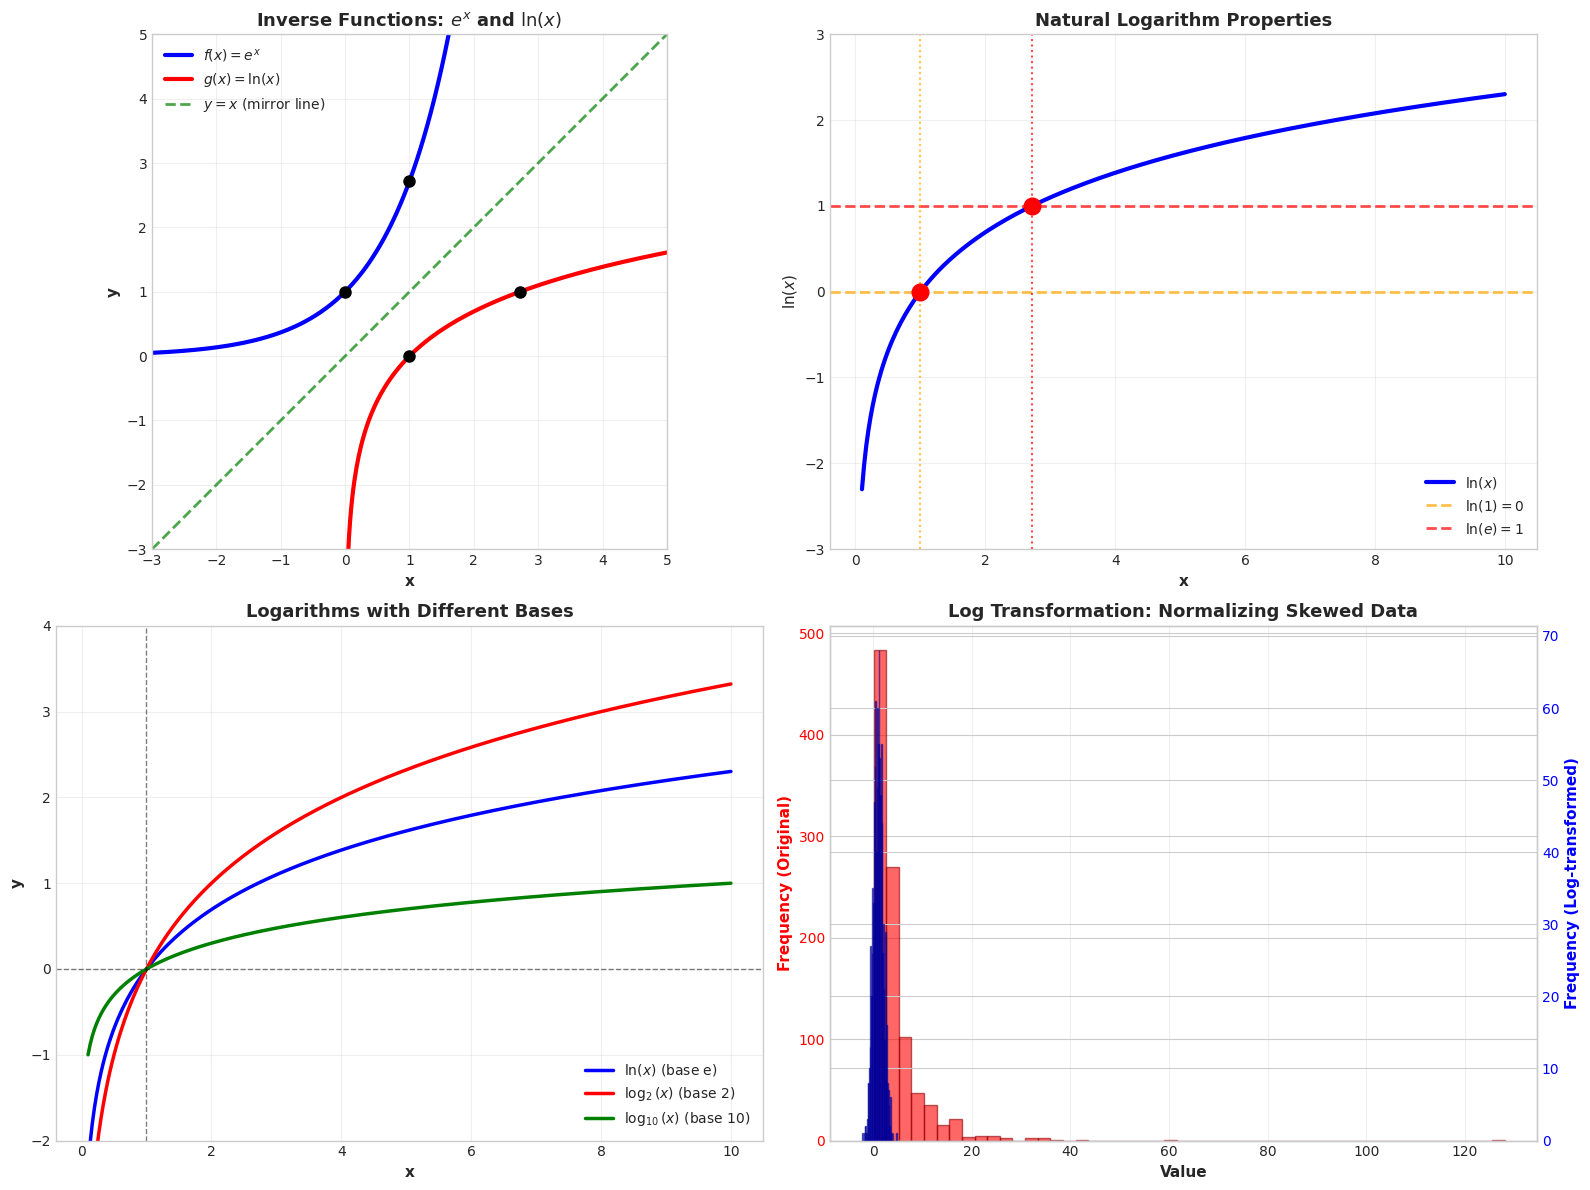

In [ ]:
# Visualization: e^x and ln(x) as Inverses
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Both functions on same graph
ax1 = axes[0, 0]
x_pos = np.linspace(0.01, 5, 300)
x_all = np.linspace(-3, 5, 300)

ax1.plot(x_all, np.exp(x_all), 'b-', linewidth=3, label='$f(x) = e^x$')
ax1.plot(x_pos, np.log(x_pos), 'r-', linewidth=3, label='$g(x) = \\ln(x)$')
ax1.plot(x_all, x_all, 'g--', linewidth=2, alpha=0.7, label='$y = x$ (mirror line)')

# Mark key points
points = [(0, 1), (1, np.e), (1, 0), (np.e, 1)]
for px, py in points:
    ax1.plot(px, py, 'ko', markersize=8, zorder=5)

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=11, fontweight='bold')
ax1.set_ylabel('y', fontsize=11, fontweight='bold')
ax1.set_title('Inverse Functions: $e^x$ and $\\ln(x)$', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_xlim(-3, 5)
ax1.set_ylim(-3, 5)
ax1.set_aspect('equal')

# Plot 2: Logarithm properties
ax2 = axes[0, 1]
x_log = np.linspace(0.1, 10, 300)

ax2.plot(x_log, np.log(x_log), 'b-', linewidth=3, label='$\\ln(x)$')
ax2.axhline(y=0, color='orange', linewidth=2, linestyle='--', alpha=0.7, label='$\\ln(1) = 0$')
ax2.axhline(y=1, color='red', linewidth=2, linestyle='--', alpha=0.7, label='$\\ln(e) = 1$')
ax2.axvline(x=1, color='orange', linewidth=1.5, linestyle=':', alpha=0.7)
ax2.axvline(x=np.e, color='red', linewidth=1.5, linestyle=':', alpha=0.7)

ax2.plot(1, 0, 'ro', markersize=12, zorder=5)
ax2.plot(np.e, 1, 'ro', markersize=12, zorder=5)

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=11, fontweight='bold')
ax2.set_ylabel('$\\ln(x)$', fontsize=11, fontweight='bold')
ax2.set_title('Natural Logarithm Properties', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_ylim(-3, 3)

# Plot 3: Different logarithm bases
ax3 = axes[1, 0]
x_bases = np.linspace(0.1, 10, 300)

ax3.plot(x_bases, np.log(x_bases), 'b-', linewidth=2.5, label='$\\ln(x)$ (base e)')
ax3.plot(x_bases, np.log2(x_bases), 'r-', linewidth=2.5, label='$\\log_2(x)$ (base 2)')
ax3.plot(x_bases, np.log10(x_bases), 'g-', linewidth=2.5, label='$\\log_{10}(x)$ (base 10)')

ax3.axhline(y=0, color='k', linewidth=1, linestyle='--', alpha=0.5)
ax3.axvline(x=1, color='k', linewidth=1, linestyle='--', alpha=0.5)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=11, fontweight='bold')
ax3.set_ylabel('y', fontsize=11, fontweight='bold')
ax3.set_title('Logarithms with Different Bases', fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.set_ylim(-2, 4)

# Plot 4: Log transformation of skewed data
ax4 = axes[1, 1]
np.random.seed(42)
# Generate log-normal data (skewed)
skewed_data = np.random.lognormal(mean=1, sigma=1, size=1000)

ax4_twin = ax4.twinx()

# Original skewed data
ax4.hist(skewed_data, bins=50, alpha=0.6, color='red', edgecolor='darkred', label='Original (skewed)')
ax4.set_xlabel('Value', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency (Original)', fontsize=11, fontweight='bold', color='red')
ax4.tick_params(axis='y', labelcolor='red')

# Log-transformed data
ax4_twin.hist(np.log(skewed_data), bins=50, alpha=0.6, color='blue', 
             edgecolor='darkblue', label='Log-transformed (normal)')
ax4_twin.set_ylabel('Frequency (Log-transformed)', fontsize=11, fontweight='bold', color='blue')
ax4_twin.tick_params(axis='y', labelcolor='blue')

ax4.set_title('Log Transformation: Normalizing Skewed Data', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [ ]:
# Solving Exponential Equations
print("\n3. SOLVING EXPONENTIAL EQUATIONS")
print("-" * 50)

print("\n   Problem 1: Solve e^x = 10")
print("   Take ln of both sides: ln(e^x) = ln(10)")
print("   x = ln(10)")
x_solution1 = np.log(10)
print(f"   x = {x_solution1:.6f}")
print(f"   Verification: e^{x_solution1:.6f} = {np.exp(x_solution1):.6f} ≈ 10 ✓")

print("\n   Problem 2: Solve 2^x = 32")
print("   Take ln of both sides: ln(2^x) = ln(32)")
print("   x·ln(2) = ln(32)")
print("   x = ln(32) / ln(2)")
x_solution2 = np.log(32) / np.log(2)
print(f"   x = {x_solution2:.6f}")
print(f"   Verification: 2^{x_solution2:.0f} = {2**x_solution2:.0f} ✓")

print("\n   Problem 3: Solve 5e^(2x) = 100")
print("   Divide by 5: e^(2x) = 20")
print("   Take ln: 2x = ln(20)")
print("   x = ln(20) / 2")
x_solution3 = np.log(20) / 2
print(f"   x = {x_solution3:.6f}")
print(f"   Verification: 5e^(2·{x_solution3:.6f}) = {5 * np.exp(2 * x_solution3):.6f} ≈ 100 ✓")


3. SOLVING EXPONENTIAL EQUATIONS
--------------------------------------------------

   Problem 1: Solve e^x = 10
   Take ln of both sides: ln(e^x) = ln(10)
   x = ln(10)
   x = 2.302585
   Verification: e^2.302585 = 10.000000 ≈ 10 ✓

   Problem 2: Solve 2^x = 32
   Take ln of both sides: ln(2^x) = ln(32)
   x·ln(2) = ln(32)
   x = ln(32) / ln(2)
   x = 5.000000
   Verification: 2^5 = 32 ✓

   Problem 3: Solve 5e^(2x) = 100
   Divide by 5: e^(2x) = 20
   Take ln: 2x = ln(20)
   x = ln(20) / 2
   x = 1.497866
   Verification: 5e^(2·1.497866) = 100.000000 ≈ 100 ✓


In [ ]:
# Data Science Application: Log-Likelihood
print("\n4. DATA SCIENCE: LOG-LIKELIHOOD")
print("-" * 50)

# Coin flip example (Bernoulli)
n_flips = 10
n_heads = 7
p_estimate = n_heads / n_flips

print(f"\n   Coin flip experiment:")
print(f"   Total flips: {n_flips}")
print(f"   Heads observed: {n_heads}")
print(f"   Estimated p(heads): {p_estimate}")

# Likelihood
from scipy.special import comb
likelihood = comb(n_flips, n_heads) * (p_estimate ** n_heads) * ((1 - p_estimate) ** (n_flips - n_heads))
log_likelihood = np.log(likelihood)

print(f"\n   Likelihood: {likelihood:.10f}")
print(f"   Log-likelihood: {log_likelihood:.4f}")
print(f"\n   Why use log-likelihood?")
print(f"   • Avoids numerical underflow (tiny probabilities)")
print(f"   • Turns products into sums: log(p₁·p₂·p₃) = log(p₁) + log(p₂) + log(p₃)")
print(f"   • Easier optimization (convex in many cases)")


4. DATA SCIENCE: LOG-LIKELIHOOD
--------------------------------------------------

   Coin flip experiment:
   Total flips: 10
   Heads observed: 7
   Estimated p(heads): 0.7

   Likelihood: 0.2668279320
   Log-likelihood: -1.3212

   Why use log-likelihood?
   • Avoids numerical underflow (tiny probabilities)
   • Turns products into sums: log(p₁·p₂·p₃) = log(p₁) + log(p₂) + log(p₃)
   • Easier optimization (convex in many cases)


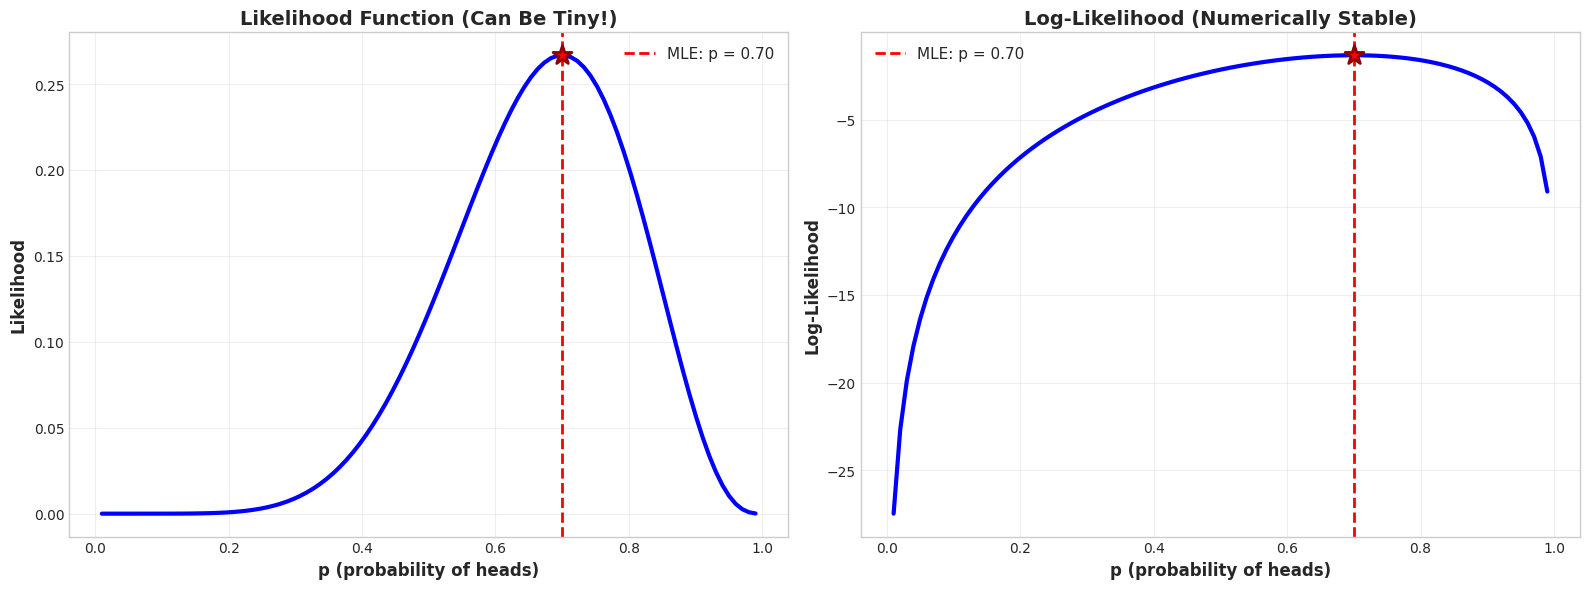


🎯 Key Insights:
   • ln(e^x) = x and e^(ln(x)) = x (inverse relationship)
   • Log laws: ln(ab) = ln(a) + ln(b), ln(a^b) = b·ln(a)
   • Solve e^x = k: Take ln, x = ln(k)
   • Log transformations normalize skewed data
   • Log-likelihood: numerical stability in ML


In [ ]:
# Visualization: Log-Likelihood
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

p_values = np.linspace(0.01, 0.99, 100)
likelihoods = [comb(n_flips, n_heads) * (p ** n_heads) * ((1 - p) ** (n_flips - n_heads)) 
               for p in p_values]
log_likelihoods = np.log(likelihoods)

# Plot 1: Likelihood (often very small)
ax1.plot(p_values, likelihoods, 'b-', linewidth=3)
ax1.axvline(x=p_estimate, color='red', linewidth=2, linestyle='--', 
           label=f'MLE: p = {p_estimate:.2f}')
ax1.scatter([p_estimate], [max(likelihoods)], s=200, c='red', marker='*', 
           edgecolors='darkred', linewidth=2, zorder=5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('p (probability of heads)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Likelihood', fontsize=12, fontweight='bold')
ax1.set_title('Likelihood Function (Can Be Tiny!)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)

# Plot 2: Log-likelihood (easier to work with)
ax2.plot(p_values, log_likelihoods, 'b-', linewidth=3)
ax2.axvline(x=p_estimate, color='red', linewidth=2, linestyle='--', 
           label=f'MLE: p = {p_estimate:.2f}')
ax2.scatter([p_estimate], [max(log_likelihoods)], s=200, c='red', marker='*', 
           edgecolors='darkred', linewidth=2, zorder=5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('p (probability of heads)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Log-Likelihood', fontsize=12, fontweight='bold')
ax2.set_title('Log-Likelihood (Numerically Stable)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("   • ln(e^x) = x and e^(ln(x)) = x (inverse relationship)")
print("   • Log laws: ln(ab) = ln(a) + ln(b), ln(a^b) = b·ln(a)")
print("   • Solve e^x = k: Take ln, x = ln(k)")
print("   • Log transformations normalize skewed data")
print("   • Log-likelihood: numerical stability in ML")

## 4. One-to-One Functions (Injective Functions)

### Definition

A function $f: A \to B$ is **one-to-one** (or **injective**) if different inputs produce different outputs.

**Formal Definition:**
$$f(x_1) = f(x_2) \implies x_1 = x_2$$

Equivalently (contrapositive):
$$x_1 \neq x_2 \implies f(x_1) \neq f(x_2)$$

**Intuition:** No two elements in the domain map to the same element in the codomain.

---

### Horizontal Line Test

**Geometric Test:** A function is one-to-one if and only if every horizontal line intersects the graph at most once.

**Why it works:**
- Horizontal line $y = c$ represents all points where $f(x) = c$
- If it intersects at two points $(x_1, c)$ and $(x_2, c)$, then $f(x_1) = f(x_2) = c$ but $x_1 \neq x_2$
- This violates the one-to-one condition

---

### Examples

| Function | One-to-One? | Reason |
|----------|-------------|---------|
| $f(x) = x$ | ✅ Yes | Identity is strictly increasing |
| $f(x) = 2x + 3$ | ✅ Yes | Linear with non-zero slope |
| $f(x) = x^2$ | ❌ No | $f(-2) = f(2) = 4$ |
| $f(x) = e^x$ | ✅ Yes | Strictly increasing |
| $f(x) = \\ln(x)$ | ✅ Yes | Strictly increasing |
| $f(x) = \\sin(x)$ | ❌ No | Periodic: $\\sin(0) = \\sin(\\pi)$ |
| $f(x) = x^3$ | ✅ Yes | Odd power, strictly increasing |
| $f(x) = \\|x\\|$ | ❌ No | $\\|-3\\| = \\|3\\| = 3$ |

---

### Theorem: Monotonic Functions are One-to-One

If $f$ is **strictly monotonic** (strictly increasing or strictly decreasing) on an interval, then $f$ is one-to-one on that interval.

**Proof (strictly increasing case):**
- Suppose $f$ is strictly increasing
- Assume $f(x_1) = f(x_2)$ for some $x_1, x_2$
- If $x_1 < x_2$, then $f(x_1) < f(x_2)$ (strictly increasing), contradiction
- If $x_1 > x_2$, then $f(x_1) > f(x_2)$ (strictly increasing), contradiction
- Therefore, $x_1 = x_2$, so $f$ is one-to-one ∎

---

### Invertibility Condition

**Theorem:** A function $f: A \to B$ has an inverse function $f^{-1}: B \to A$ if and only if $f$ is **bijective** (both one-to-one and onto).

For practical purposes with real-valued functions:
- **One-to-one** ensures $f^{-1}$ is well-defined (no ambiguity)
- **Onto** ensures $f^{-1}$ has the correct domain

**Domain Restriction:** If a function is not one-to-one on its natural domain, we can restrict the domain to make it one-to-one.

**Example:**
- $f(x) = x^2$ on $\mathbb{R}$ is not one-to-one
- $f(x) = x^2$ on $[0, \infty)$ **is** one-to-one
- Inverse: $f^{-1}(x) = \sqrt{x}$ on $[0, \infty)$

---

### Composition Test

If $f$ and $g$ are both one-to-one, then $f \circ g$ is also one-to-one.

**Proof:**
- Suppose $(f \circ g)(x_1) = (f \circ g)(x_2)$
- Then $f(g(x_1)) = f(g(x_2))$
- Since $f$ is one-to-one: $g(x_1) = g(x_2)$
- Since $g$ is one-to-one: $x_1 = x_2$ ∎

---

### Data Science Applications

1. **Feature Engineering:**
   - One-to-one transformations preserve information
   - Examples: log-transform, standardization, min-max scaling

2. **Hashing:**
   - Ideal hash functions are one-to-one (no collisions)
   - Cryptographic hash functions approximate this property

3. **Encoding:**
   - One-hot encoding creates one-to-one mapping from categories to binary vectors
   - Label encoding should be one-to-one to prevent information loss

4. **Dimensionality Reduction:**
   - PCA seeks directions that preserve most variance (approximately one-to-one)
   - Autoencoders learn compressed representations

5. **Bijective Neural Networks:**
   - Invertible neural networks (e.g., normalizing flows)
   - Enable exact likelihood computation for generative models

---

### Common Pitfalls

⚠️ **Confusing one-to-one with onto:**
- **One-to-one (injective):** Different inputs → different outputs
- **Onto (surjective):** Every output is achieved by some input
- **Bijective:** Both one-to-one and onto

⚠️ **Domain matters:**
- $f(x) = x^2$ is not one-to-one on $\mathbb{R}$
- But it **is** one-to-one on $[0, \infty)$ or $(-\infty, 0]$

⚠️ **Periodic functions cannot be globally one-to-one:**
- $\sin(x)$, $\cos(x)$ repeat values
- But can restrict domain: $\sin(x)$ on $[-\pi/2, \pi/2]$ is one-to-one

In [ ]:
# One-to-One Functions

print("=" * 70)
print("ONE-TO-ONE (INJECTIVE) FUNCTIONS")
print("=" * 70)

# Function to test if a function is one-to-one numerically
def is_one_to_one_numerical(func, x_values, tolerance=1e-9):
    """
    Test if a function is one-to-one by checking if distinct inputs
    produce distinct outputs.
    """
    y_values = [func(x) for x in x_values]
    
    for i in range(len(y_values)):
        for j in range(i + 1, len(y_values)):
            if abs(y_values[i] - y_values[j]) < tolerance:
                return False, x_values[i], x_values[j], y_values[i]
    return True, None, None, None

# Test various functions
print("\n1. TESTING FUNCTIONS FOR ONE-TO-ONE PROPERTY")
print("-" * 50)

test_range = np.linspace(-5, 5, 100)
test_range_pos = np.linspace(0.1, 5, 100)

functions_to_test = [
    ("f(x) = x", lambda x: x, test_range),
    ("f(x) = 2x + 3", lambda x: 2*x + 3, test_range),
    ("f(x) = x²", lambda x: x**2, test_range),
    ("f(x) = x³", lambda x: x**3, test_range),
    ("f(x) = eˣ", lambda x: np.exp(x), test_range),
    ("f(x) = ln(x)", lambda x: np.log(x), test_range_pos),
    ("f(x) = sin(x)", lambda x: np.sin(x), test_range),
    ("f(x) = |x|", lambda x: np.abs(x), test_range),
]

results = []
for name, func, x_vals in functions_to_test:
    is_oto, x1, x2, y = is_one_to_one_numerical(func, x_vals)
    results.append((name, is_oto, x1, x2, y))
    
    status = "✅ ONE-TO-ONE" if is_oto else "❌ NOT one-to-one"
    print(f"\n   {name:20s} → {status}")
    
    if not is_oto:
        print(f"      Counterexample: f({x1:.2f}) = f({x2:.2f}) = {y:.4f}")

ONE-TO-ONE (INJECTIVE) FUNCTIONS

1. TESTING FUNCTIONS FOR ONE-TO-ONE PROPERTY
--------------------------------------------------

   f(x) = x             → ✅ ONE-TO-ONE

   f(x) = 2x + 3        → ✅ ONE-TO-ONE

   f(x) = x²            → ❌ NOT one-to-one
      Counterexample: f(-5.00) = f(5.00) = 25.0000

   f(x) = x³            → ✅ ONE-TO-ONE

   f(x) = eˣ            → ✅ ONE-TO-ONE

   f(x) = ln(x)         → ✅ ONE-TO-ONE

   f(x) = sin(x)        → ✅ ONE-TO-ONE

   f(x) = |x|           → ❌ NOT one-to-one
      Counterexample: f(-5.00) = f(5.00) = 5.0000


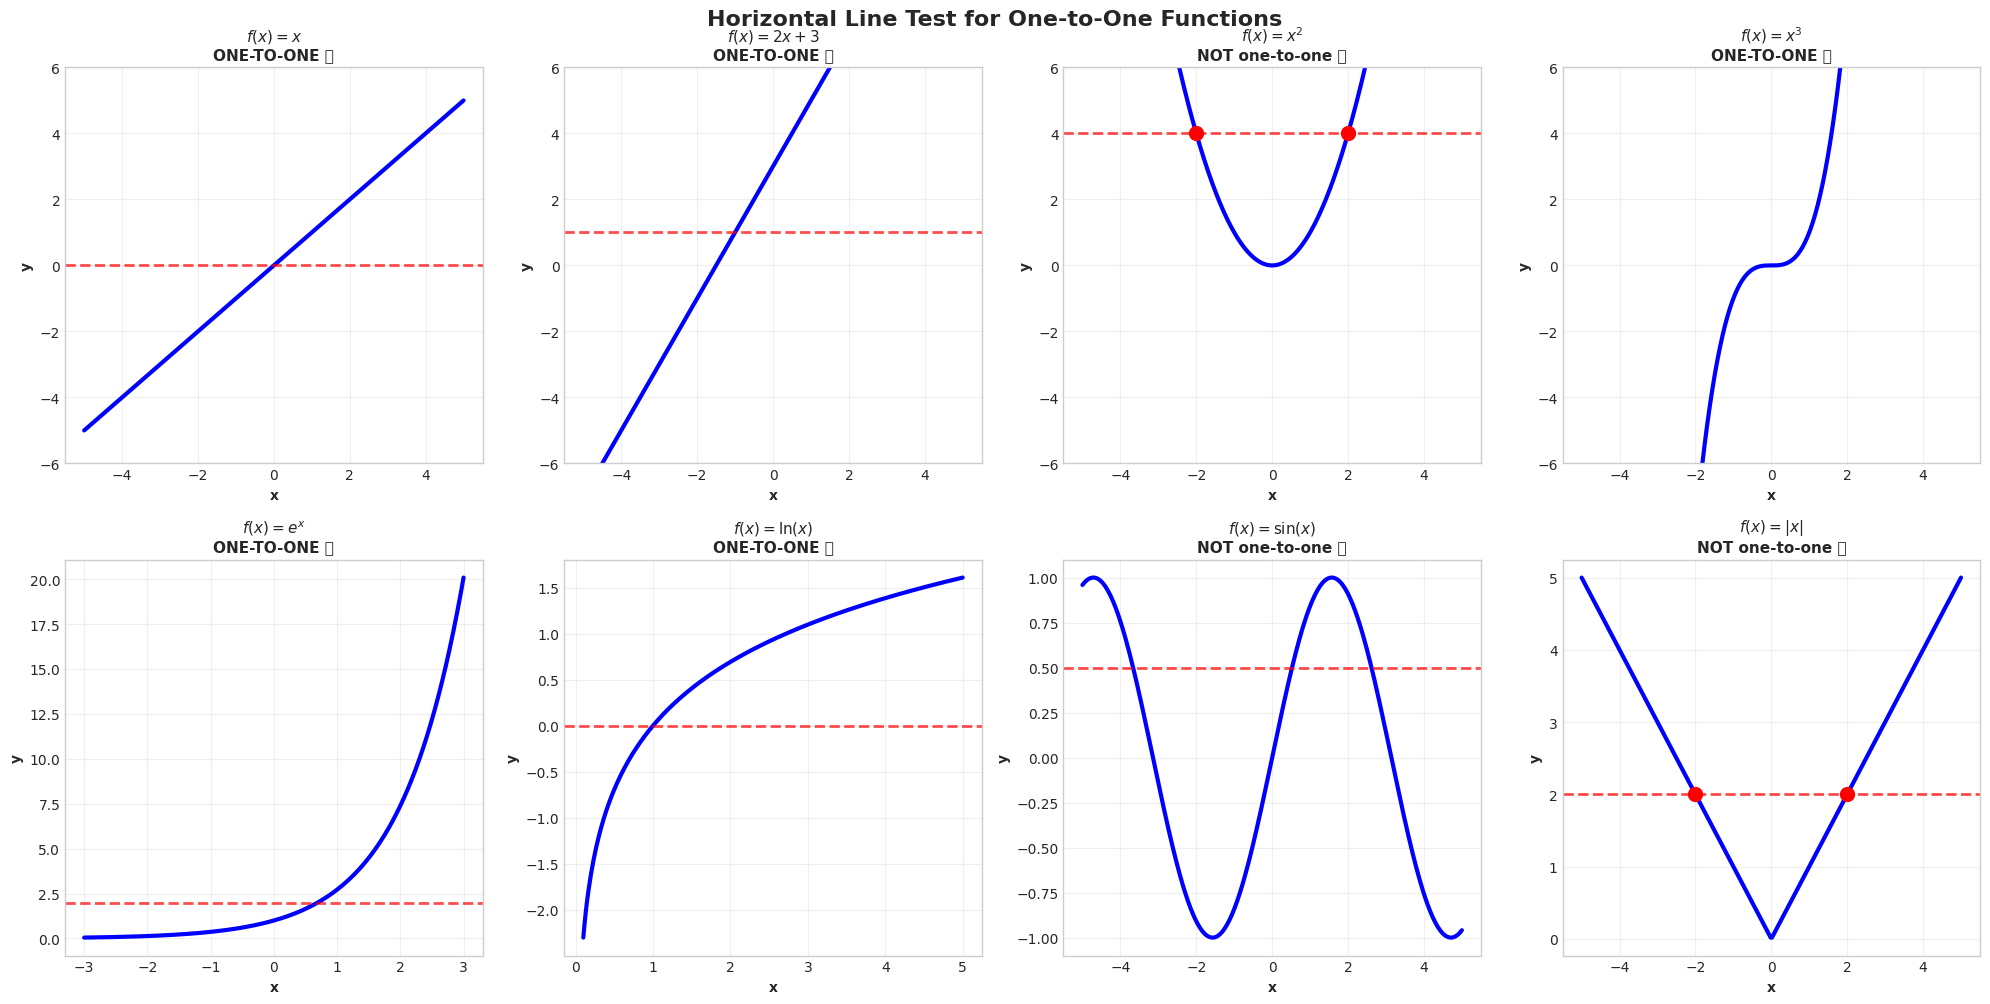

In [ ]:
# Visualization: Horizontal Line Test
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

x_plot = np.linspace(-5, 5, 300)
x_plot_pos = np.linspace(0.1, 5, 300)

plot_configs = [
    ("$f(x) = x$", lambda x: x, x_plot, True, [0]),
    ("$f(x) = 2x + 3$", lambda x: 2*x + 3, x_plot, True, [1]),
    ("$f(x) = x^2$", lambda x: x**2, x_plot, False, [4]),
    ("$f(x) = x^3$", lambda x: x**3, x_plot, True, [8]),
    ("$f(x) = e^x$", lambda x: np.exp(x), np.linspace(-3, 3, 300), True, [2]),
    ("$f(x) = \\ln(x)$", lambda x: np.log(x), x_plot_pos, True, [0]),
    ("$f(x) = \\sin(x)$", lambda x: np.sin(x), x_plot, False, [0.5]),
    ("$f(x) = |x|$", lambda x: np.abs(x), x_plot, False, [2]),
]

for idx, (title, func, x_vals, is_oto, hline_y) in enumerate(plot_configs):
    ax = axes[idx]
    
    y_vals = func(x_vals)
    ax.plot(x_vals, y_vals, 'b-', linewidth=3, label=title)
    
    # Add horizontal line(s)
    for y_val in hline_y:
        ax.axhline(y=y_val, color='red', linewidth=2, linestyle='--', alpha=0.7)
        
        # Find intersections
        if title == "$f(x) = x^2$":
            intersections = [np.sqrt(y_val), -np.sqrt(y_val)]
            for x_int in intersections:
                ax.plot(x_int, y_val, 'ro', markersize=10, zorder=5)
        elif title == "$f(x) = \\sin(x)$":
            # Multiple intersections for sin
            pass
        elif title == "$f(x) = |x|$":
            intersections = [y_val, -y_val]
            for x_int in intersections:
                ax.plot(x_int, y_val, 'ro', markersize=10, zorder=5)
    
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x', fontsize=10, fontweight='bold')
    ax.set_ylabel('y', fontsize=10, fontweight='bold')
    
    status = "ONE-TO-ONE ✅" if is_oto else "NOT one-to-one ❌"
    ax.set_title(f'{title}\n{status}', fontsize=11, fontweight='bold')
    
    if idx < 4:
        ax.set_ylim(-6, 6)

plt.tight_layout()
plt.suptitle('Horizontal Line Test for One-to-One Functions', 
             fontsize=16, fontweight='bold', y=1.00)
plt.show()

In [ ]:
# Domain Restriction to Achieve One-to-One
print("\n2. DOMAIN RESTRICTION TO ACHIEVE ONE-TO-ONE")
print("-" * 50)

print("\n   Original: f(x) = x² on ℝ")
print("   NOT one-to-one: f(-2) = f(2) = 4")

print("\n   Restriction 1: f(x) = x² on [0, ∞)")
x_restricted1 = np.linspace(0, 5, 50)
is_oto1, _, _, _ = is_one_to_one_numerical(lambda x: x**2, x_restricted1)
print(f"   ONE-TO-ONE: {is_oto1} ✅")
print(f"   Inverse: f⁻¹(x) = √x")

print("\n   Restriction 2: f(x) = x² on (-∞, 0]")
x_restricted2 = np.linspace(-5, 0, 50)
is_oto2, _, _, _ = is_one_to_one_numerical(lambda x: x**2, x_restricted2)
print(f"   ONE-TO-ONE: {is_oto2} ✅")
print(f"   Inverse: f⁻¹(x) = -√x")


2. DOMAIN RESTRICTION TO ACHIEVE ONE-TO-ONE
--------------------------------------------------

   Original: f(x) = x² on ℝ
   NOT one-to-one: f(-2) = f(2) = 4

   Restriction 1: f(x) = x² on [0, ∞)
   ONE-TO-ONE: True ✅
   Inverse: f⁻¹(x) = √x

   Restriction 2: f(x) = x² on (-∞, 0]
   ONE-TO-ONE: True ✅
   Inverse: f⁻¹(x) = -√x


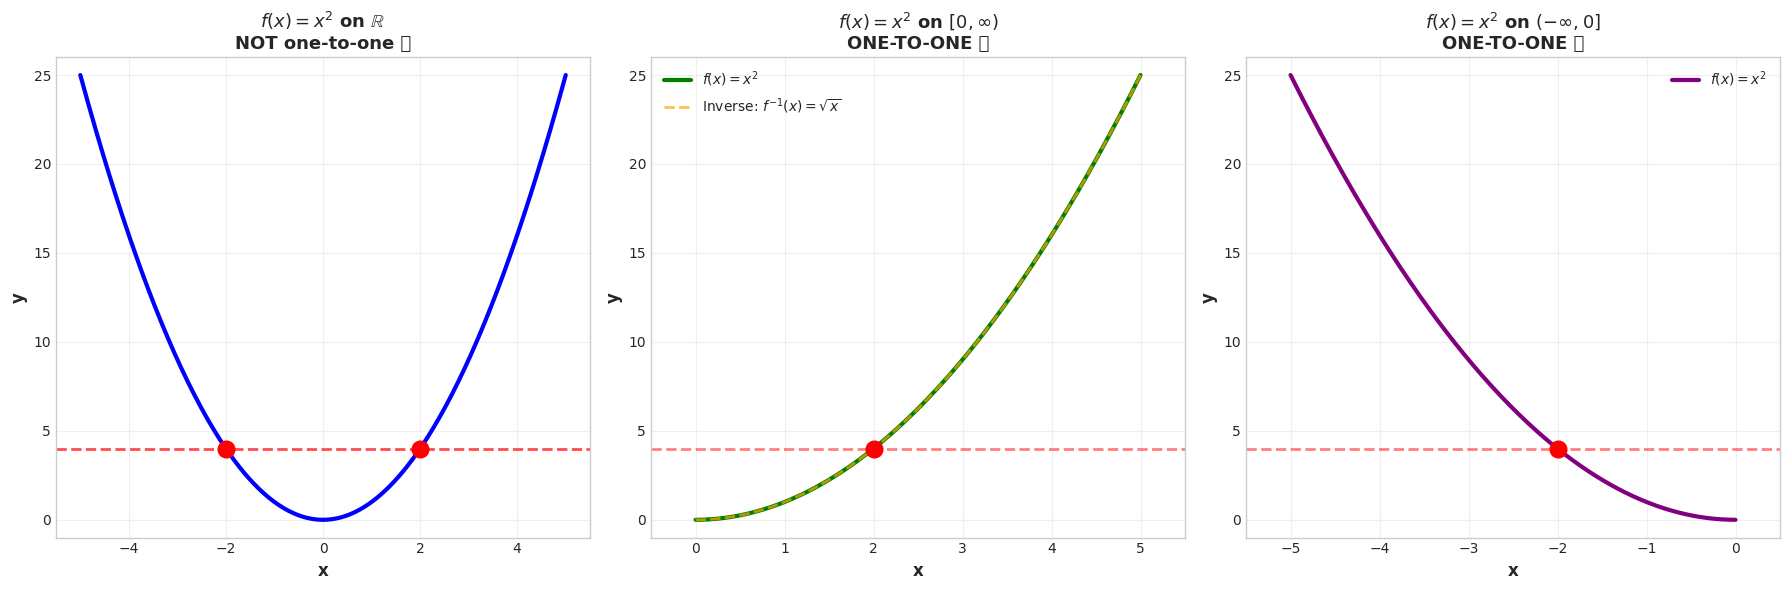

In [ ]:
# Visualization: Domain Restriction
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

x_full = np.linspace(-5, 5, 300)
x_pos = np.linspace(0, 5, 300)
x_neg = np.linspace(-5, 0, 300)

# Full domain (not one-to-one)
ax1 = axes[0]
ax1.plot(x_full, x_full**2, 'b-', linewidth=3)
ax1.axhline(y=4, color='red', linewidth=2, linestyle='--', alpha=0.7)
ax1.plot(-2, 4, 'ro', markersize=12, zorder=5)
ax1.plot(2, 4, 'ro', markersize=12, zorder=5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title('$f(x) = x^2$ on $\\mathbb{R}$\nNOT one-to-one ❌', 
             fontsize=13, fontweight='bold')
ax1.set_xlim(-5.5, 5.5)
ax1.set_ylim(-1, 26)

# Restricted to [0, ∞)
ax2 = axes[1]
ax2.plot(x_pos, x_pos**2, 'g-', linewidth=3, label='$f(x) = x^2$')
ax2.plot(np.sqrt(x_pos**2), x_pos**2, 'orange', linewidth=2, 
        linestyle='--', alpha=0.7, label='Inverse: $f^{-1}(x) = \\sqrt{x}$')
ax2.axhline(y=4, color='red', linewidth=2, linestyle='--', alpha=0.5)
ax2.plot(2, 4, 'ro', markersize=12, zorder=5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title('$f(x) = x^2$ on $[0, \\infty)$\nONE-TO-ONE ✅', 
             fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_xlim(-0.5, 5.5)
ax2.set_ylim(-1, 26)

# Restricted to (-∞, 0]
ax3 = axes[2]
ax3.plot(x_neg, x_neg**2, 'purple', linewidth=3, label='$f(x) = x^2$')
ax3.axhline(y=4, color='red', linewidth=2, linestyle='--', alpha=0.5)
ax3.plot(-2, 4, 'ro', markersize=12, zorder=5)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=12, fontweight='bold')
ax3.set_ylabel('y', fontsize=12, fontweight='bold')
ax3.set_title('$f(x) = x^2$ on $(-\\infty, 0]$\nONE-TO-ONE ✅', 
             fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.set_xlim(-5.5, 0.5)
ax3.set_ylim(-1, 26)

plt.tight_layout()
plt.show()

In [ ]:
# Data Science Application: Hash Functions
print("\n3. DATA SCIENCE APPLICATION: HASH FUNCTIONS")
print("-" * 50)

print("\n   Hash functions map data of arbitrary size to fixed-size values.")
print("   Ideal property: ONE-TO-ONE (no collisions)")
print("   Reality: Collisions are possible, but should be rare\n")

# Simple hash function demonstration
def simple_hash(s, table_size=100):
    """Simple hash function: sum of ASCII values mod table_size"""
    return sum(ord(c) for c in s) % table_size

test_strings = ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace"]
hash_values = [simple_hash(s) for s in test_strings]

print("   Simple Hash Function (sum of ASCII values mod 100):")
print(f"   {'String':15s} | {'Hash Value':12s}")
print("   " + "-" * 30)
for s, h in zip(test_strings, hash_values):
    print(f"   {s:15s} | {h:12d}")

# Check for collisions
unique_hashes = len(set(hash_values))
total_strings = len(test_strings)
print(f"\n   Total strings: {total_strings}")
print(f"   Unique hash values: {unique_hashes}")
if unique_hashes == total_strings:
    print("   Result: NO COLLISIONS ✅ (one-to-one on this sample)")
else:
    print("   Result: COLLISIONS DETECTED ❌ (not one-to-one)")


3. DATA SCIENCE APPLICATION: HASH FUNCTIONS
--------------------------------------------------

   Hash functions map data of arbitrary size to fixed-size values.
   Ideal property: ONE-TO-ONE (no collisions)
   Reality: Collisions are possible, but should be rare

   Simple Hash Function (sum of ASCII values mod 100):
   String          | Hash Value  
   ------------------------------
   Alice           |           78
   Bob             |           75
   Charlie         |           96
   David           |           88
   Eve             |           88
   Frank           |           98
   Grace           |           82

   Total strings: 7
   Unique hash values: 6
   Result: COLLISIONS DETECTED ❌ (not one-to-one)


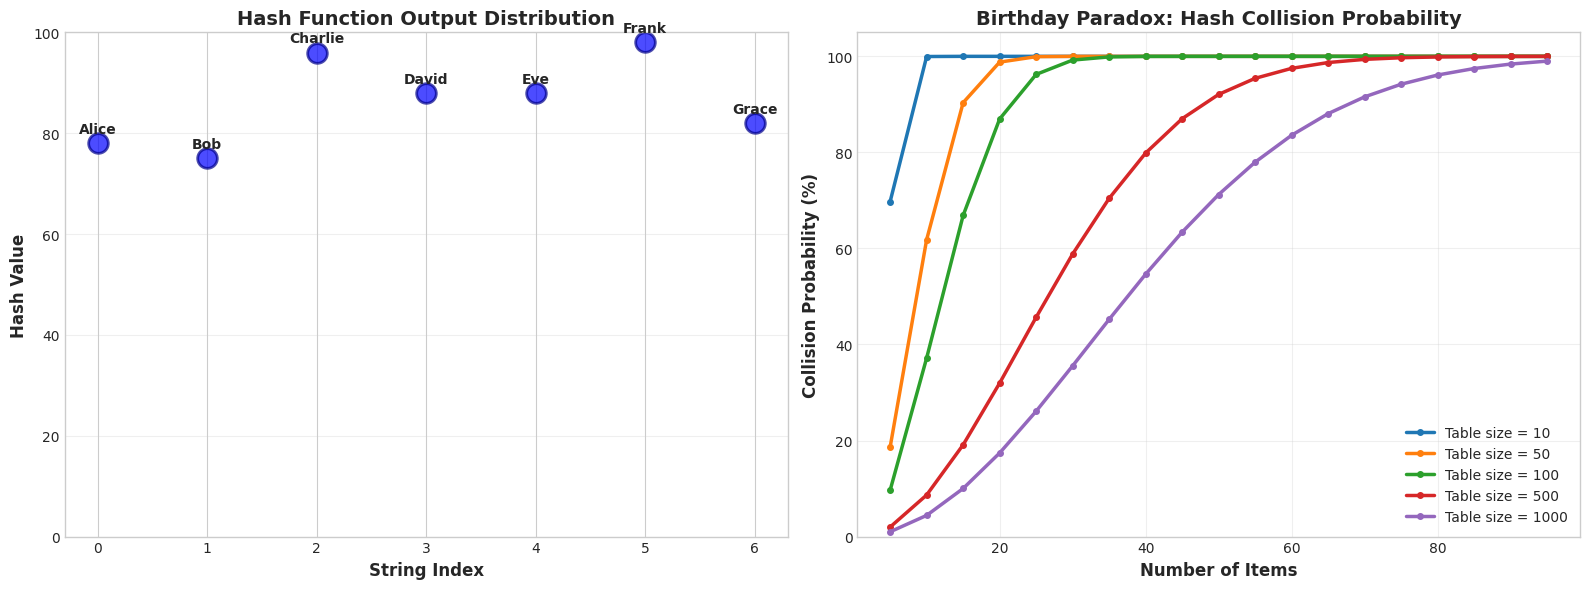


🎯 Key Insights:
   • One-to-one: different inputs → different outputs
   • Horizontal line test: intersects graph at most once
   • Domain restriction can make non-injective functions injective
   • Hash functions: ideal is one-to-one, reality is minimizing collisions


In [ ]:
# Visualization: Hash Functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Hash values
ax1.scatter(range(len(test_strings)), hash_values, s=200, c='blue', 
           edgecolors='darkblue', linewidth=2, alpha=0.7)
for i, (s, h) in enumerate(zip(test_strings, hash_values)):
    ax1.text(i, h + 2, s, ha='center', fontsize=10, fontweight='bold')

ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xlabel('String Index', fontsize=12, fontweight='bold')
ax1.set_ylabel('Hash Value', fontsize=12, fontweight='bold')
ax1.set_title('Hash Function Output Distribution', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(test_strings)))
ax1.set_ylim(0, 100)

# Plot 2: Collision probability with random data
np.random.seed(42)
table_sizes = [10, 50, 100, 500, 1000]
n_items_range = np.arange(5, 100, 5)

for table_size in table_sizes:
    collision_probs = []
    
    for n_items in n_items_range:
        # Birthday paradox approximation
        prob_no_collision = 1.0
        for i in range(1, n_items):
            prob_no_collision *= (table_size - i) / table_size
        collision_prob = 1 - prob_no_collision
        collision_probs.append(collision_prob * 100)
    
    ax2.plot(n_items_range, collision_probs, linewidth=2.5, 
            label=f'Table size = {table_size}', marker='o', markersize=4)

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Number of Items', fontsize=12, fontweight='bold')
ax2.set_ylabel('Collision Probability (%)', fontsize=12, fontweight='bold')
ax2.set_title('Birthday Paradox: Hash Collision Probability', 
             fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_ylim(0, 105)

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("   • One-to-one: different inputs → different outputs")
print("   • Horizontal line test: intersects graph at most once")
print("   • Domain restriction can make non-injective functions injective")
print("   • Hash functions: ideal is one-to-one, reality is minimizing collisions")

## 5. Compound Interest Applications

### Simple vs. Compound Interest

**Simple Interest:** Interest calculated only on principal
$$A = P(1 + rt)$$

**Compound Interest:** Interest calculated on principal + accumulated interest
$$A = P\left(1 + \frac{r}{n}\right)^{nt}$$

Where:
- $A$ = Final amount
- $P$ = Principal (initial investment)
- $r$ = Annual interest rate (as decimal)
- $t$ = Time (in years)
- $n$ = Compounding frequency per year

---

### Continuous Compounding

As compounding becomes more frequent ($n \to \infty$), we approach **continuous compounding:**

$$A = Pe^{rt}$$

**Derivation:**
$$\lim_{n \to \infty} P\left(1 + \frac{r}{n}\right)^{nt} = P\lim_{n \to \infty}\left[\left(1 + \frac{r}{n}\right)^{n/r}\right]^{rt} = Pe^{rt}$$

Using the fundamental limit: $\lim_{m \to \infty}\left(1 + \frac{1}{m}\right)^m = e$

---

### Compounding Frequencies

| Frequency | $n$ value | Formula |
|-----------|-----------|---------|
| Annually | 1 | $A = P(1 + r)^t$ |
| Semi-annually | 2 | $A = P(1 + r/2)^{2t}$ |
| Quarterly | 4 | $A = P(1 + r/4)^{4t}$ |
| Monthly | 12 | $A = P(1 + r/12)^{12t}$ |
| Daily | 365 | $A = P(1 + r/365)^{365t}$ |
| Continuously | $\infty$ | $A = Pe^{rt}$ |

---

### Effective Annual Rate (EAR)

The **effective annual rate** accounts for compounding:

$$\text{EAR} = \left(1 + \frac{r}{n}\right)^n - 1$$

For continuous compounding:
$$\text{EAR} = e^r - 1$$

**Example:** 12% APR compounded monthly
$$\text{EAR} = \left(1 + \frac{0.12}{12}\right)^{12} - 1 = 0.1268 = 12.68\%$$

---

### Doubling Time

**Rule of 72:** Quick approximation for doubling time
$$t_{\text{double}} \approx \frac{72}{r \times 100}$$

**Exact formula (continuous compounding):**
$$2P = Pe^{rt} \implies 2 = e^{rt} \implies \ln(2) = rt$$
$$t_{\text{double}} = \frac{\ln(2)}{r} \approx \frac{0.693}{r}$$

**Example:** At 6% interest:
- Rule of 72: $72 / 6 = 12$ years
- Exact: $\ln(2) / 0.06 = 11.55$ years

---

### Present Value

To find the present value $P$ needed to reach target $A$:

$$P = \frac{A}{\left(1 + \frac{r}{n}\right)^{nt}}$$

For continuous compounding:
$$P = Ae^{-rt}$$

**Application:** How much to invest today to have $100,000 in 20 years at 7% annual interest (compounded continuously)?

$$P = 100{,}000 \cdot e^{-0.07 \times 20} = 100{,}000 \cdot e^{-1.4} \approx \$24{,}660$$

---

### Loan Amortization

For a loan with monthly payments, the payment amount $M$ is:

$$M = P \cdot \frac{r(1+r)^n}{(1+r)^n - 1}$$

Where:
- $P$ = Loan principal
- $r$ = Monthly interest rate
- $n$ = Total number of payments

---

### Data Science Applications

1. **Time Value of Money:**
   - Net Present Value (NPV) calculations
   - Discounted Cash Flow (DCF) analysis
   - Investment portfolio optimization

2. **Machine Learning:**
   - Learning rate decay schedules (exponential decay)
   - Exponentially weighted moving averages in optimization (Adam, RMSprop)
   - Temporal discounting in reinforcement learning

3. **Growth Modeling:**
   - User acquisition projections
   - Revenue forecasting with compound growth
   - Viral coefficient modeling (similar to compound interest)

4. **Risk Analysis:**
   - Monte Carlo simulations for retirement planning
   - Sensitivity analysis for investment decisions
   - Probability of reaching financial goals

5. **Business Analytics:**
   - Customer Lifetime Value (CLV) with discount rate
   - Retention rate impact (compound effect)
   - A/B testing: cumulative impact of conversion rate improvements

---

### Key Formulas Summary

| Scenario | Formula |
|----------|---------|
| Compound interest | $A = P(1 + r/n)^{nt}$ |
| Continuous compounding | $A = Pe^{rt}$ |
| Effective annual rate | $\text{EAR} = (1 + r/n)^n - 1$ |
| Doubling time | $t = \ln(2) / r$ |
| Present value | $P = Ae^{-rt}$ |
| Loan payment | $M = P \cdot \frac{r(1+r)^n}{(1+r)^n - 1}$ |

In [ ]:
# Compound Interest Applications

print("=" * 70)
print("COMPOUND INTEREST APPLICATIONS")
print("=" * 70)

# Investment parameters
P = 10000  # Principal: $10,000
r = 0.06   # Annual interest rate: 6%
t = 20     # Time: 20 years

print(f"\n💰 Investment Scenario:")
print(f"   Principal: ${P:,.2f}")
print(f"   Annual Interest Rate: {r*100:.1f}%")
print(f"   Time Period: {t} years")

# Calculate with different compounding frequencies
print("\n1. COMPOUNDING FREQUENCY COMPARISON")
print("-" * 50)

frequencies = [
    ("Annually", 1),
    ("Semi-annually", 2),
    ("Quarterly", 4),
    ("Monthly", 12),
    ("Weekly", 52),
    ("Daily", 365),
    ("Continuously", np.inf)
]

results = []
print(f"\n   {'Frequency':20s} | {'n':>6s} | {'Final Amount':>15s} | {'Total Interest':>15s}")
print("   " + "-" * 70)

for name, n in frequencies:
    if n == np.inf:
        # Continuous compounding
        A = P * np.exp(r * t)
        n_str = "∞"
    else:
        # Discrete compounding
        A = P * (1 + r/n) ** (n * t)
        n_str = str(n)
    
    interest = A - P
    results.append((name, n, A, interest))
    print(f"   {name:20s} | {n_str:>6s} | ${A:14,.2f} | ${interest:14,.2f}")

COMPOUND INTEREST APPLICATIONS

💰 Investment Scenario:
   Principal: $10,000.00
   Annual Interest Rate: 6.0%
   Time Period: 20 years

1. COMPOUNDING FREQUENCY COMPARISON
--------------------------------------------------

   Frequency            |      n |    Final Amount |  Total Interest
   ----------------------------------------------------------------------
   Annually             |      1 | $     32,071.35 | $     22,071.35
   Semi-annually        |      2 | $     32,620.38 | $     22,620.38
   Quarterly            |      4 | $     32,906.63 | $     22,906.63
   Monthly              |     12 | $     33,102.04 | $     23,102.04
   Weekly               |     52 | $     33,178.21 | $     23,178.21
   Daily                |    365 | $     33,197.90 | $     23,197.90
   Continuously         |      ∞ | $     33,201.17 | $     23,201.17


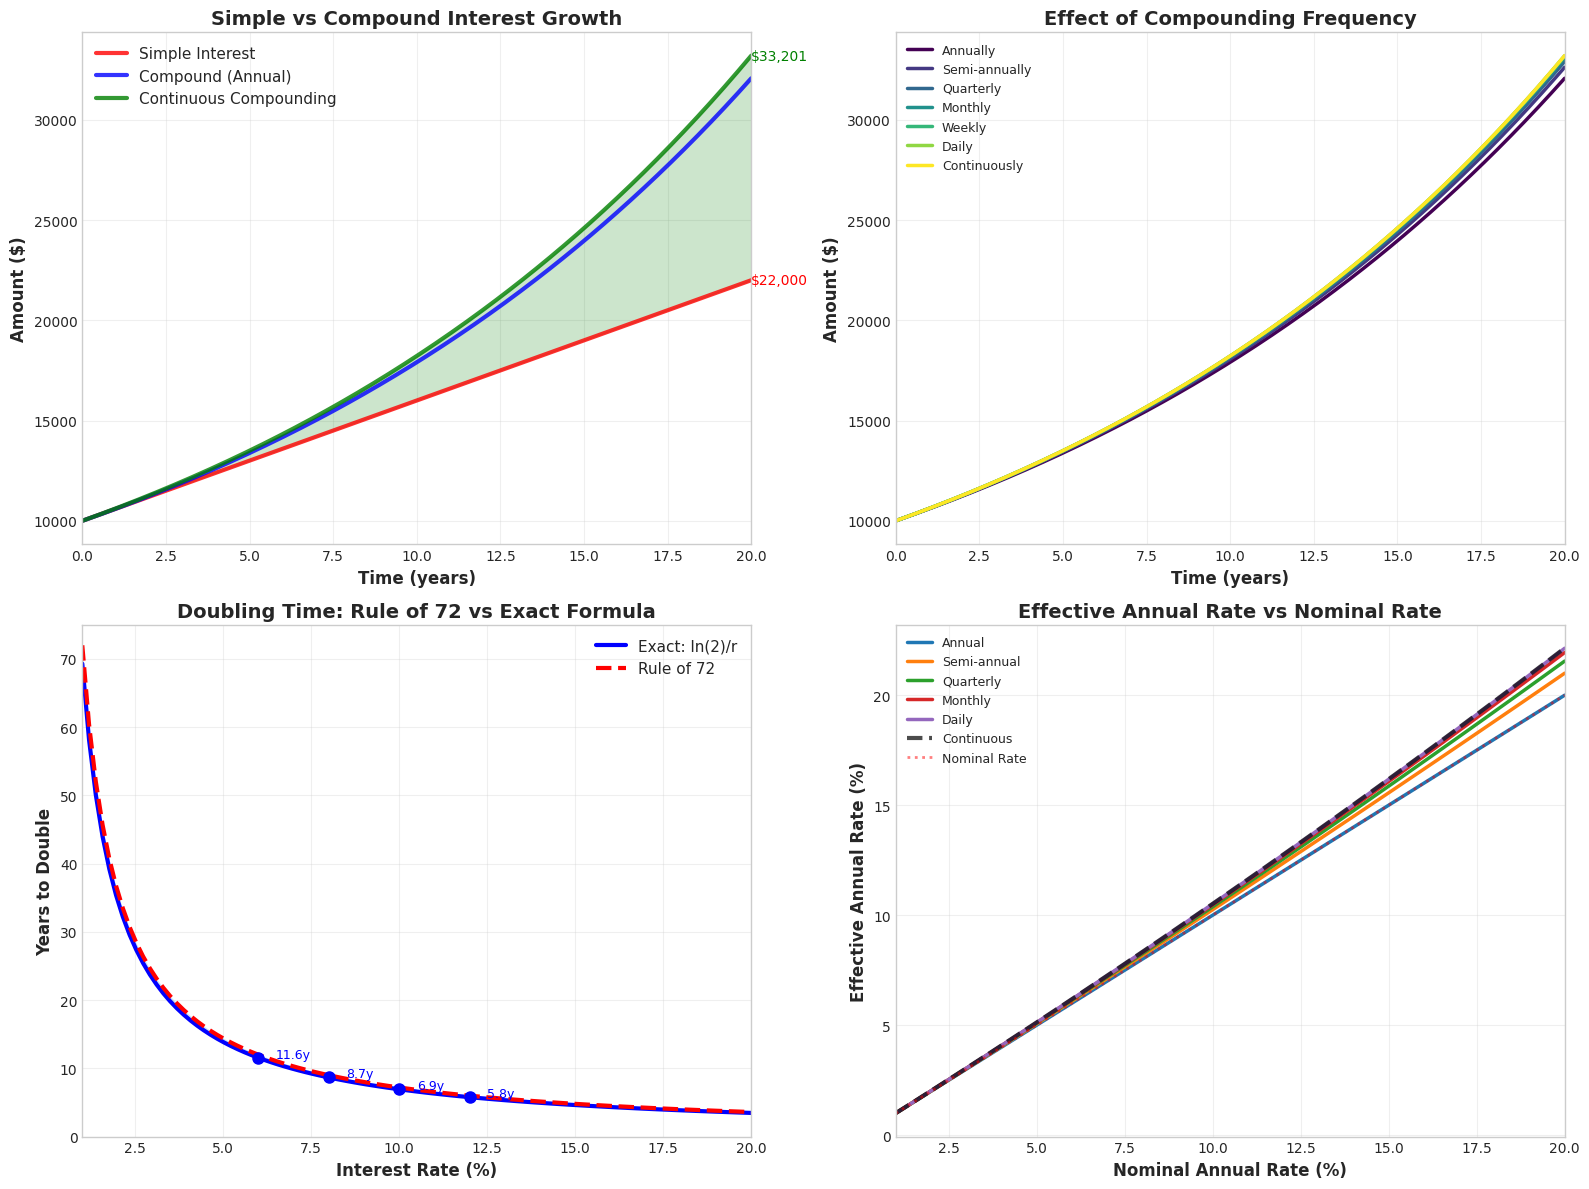

In [ ]:
# Visualization: Compound Interest Growth
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

time_range = np.linspace(0, t, 300)

# Plot 1: Simple vs Compound (annual)
ax1 = axes[0, 0]
simple = P * (1 + r * time_range)
compound_annual = P * (1 + r) ** time_range
compound_continuous = P * np.exp(r * time_range)

ax1.plot(time_range, simple, 'r-', linewidth=3, label='Simple Interest', alpha=0.8)
ax1.plot(time_range, compound_annual, 'b-', linewidth=3, label='Compound (Annual)', alpha=0.8)
ax1.plot(time_range, compound_continuous, 'g-', linewidth=3, label='Continuous Compounding', alpha=0.8)
ax1.fill_between(time_range, simple, compound_continuous, alpha=0.2, color='green')

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Time (years)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Amount ($)', fontsize=12, fontweight='bold')
ax1.set_title('Simple vs Compound Interest Growth', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_xlim(0, t)

# Annotate final values
ax1.text(t, simple[-1], f'${simple[-1]:,.0f}', fontsize=10, ha='left', va='center', color='red')
ax1.text(t, compound_continuous[-1], f'${compound_continuous[-1]:,.0f}', 
        fontsize=10, ha='left', va='center', color='green')

# Plot 2: Effect of compounding frequency
ax2 = axes[0, 1]
colors = plt.cm.viridis(np.linspace(0, 1, len(frequencies)))

for idx, (name, n) in enumerate(frequencies):
    if n == np.inf:
        amounts = P * np.exp(r * time_range)
    else:
        amounts = P * (1 + r/n) ** (n * time_range)
    
    ax2.plot(time_range, amounts, linewidth=2.5, label=name, color=colors[idx])

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Time (years)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Amount ($)', fontsize=12, fontweight='bold')
ax2.set_title('Effect of Compounding Frequency', fontsize=14, fontweight='bold')
ax2.legend(fontsize=9, loc='upper left')
ax2.set_xlim(0, t)

# Plot 3: Doubling time for different rates
ax3 = axes[1, 0]
rates = np.linspace(0.01, 0.20, 100)  # 1% to 20%
doubling_exact = np.log(2) / rates
doubling_rule72 = 72 / (rates * 100)

ax3.plot(rates * 100, doubling_exact, 'b-', linewidth=3, label='Exact: ln(2)/r')
ax3.plot(rates * 100, doubling_rule72, 'r--', linewidth=3, label='Rule of 72')
ax3.fill_between(rates * 100, doubling_exact, doubling_rule72, alpha=0.2)

ax3.grid(True, alpha=0.3)
ax3.set_xlabel('Interest Rate (%)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Years to Double', fontsize=12, fontweight='bold')
ax3.set_title('Doubling Time: Rule of 72 vs Exact Formula', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.set_xlim(1, 20)
ax3.set_ylim(0, 75)

# Annotate key rates
for rate_pct in [6, 8, 10, 12]:
    rate = rate_pct / 100
    exact = np.log(2) / rate
    rule = 72 / rate_pct
    ax3.plot(rate_pct, exact, 'bo', markersize=8)
    ax3.text(rate_pct + 0.5, exact, f'{exact:.1f}y', fontsize=9, color='blue')

# Plot 4: Effective Annual Rate
ax4 = axes[1, 1]
nominal_rates = np.linspace(0.01, 0.20, 100)
compounding_ns = [1, 2, 4, 12, 365]
compounding_names = ['Annual', 'Semi-annual', 'Quarterly', 'Monthly', 'Daily']

for n, name in zip(compounding_ns, compounding_names):
    ear = (1 + nominal_rates/n) ** n - 1
    ax4.plot(nominal_rates * 100, ear * 100, linewidth=2.5, label=name)

# Continuous compounding
ear_continuous = np.exp(nominal_rates) - 1
ax4.plot(nominal_rates * 100, ear_continuous * 100, 'k--', linewidth=3, 
        label='Continuous', alpha=0.7)

# Reference line (nominal = effective)
ax4.plot(nominal_rates * 100, nominal_rates * 100, 'r:', linewidth=2, 
        label='Nominal Rate', alpha=0.5)

ax4.grid(True, alpha=0.3)
ax4.set_xlabel('Nominal Annual Rate (%)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Effective Annual Rate (%)', fontsize=12, fontweight='bold')
ax4.set_title('Effective Annual Rate vs Nominal Rate', fontsize=14, fontweight='bold')
ax4.legend(fontsize=9)
ax4.set_xlim(1, 20)

plt.tight_layout()
plt.show()

In [ ]:
# Retirement Planning Scenario
print("\n2. RETIREMENT PLANNING SCENARIO")
print("-" * 50)

monthly_contribution = 500  # $500/month
annual_return = 0.07        # 7% annual return
years = 30                  # 30 years until retirement
n_months = years * 12

print(f"\n   Monthly Contribution: ${monthly_contribution:,.2f}")
print(f"   Annual Return: {annual_return*100:.1f}%")
print(f"   Time Horizon: {years} years ({n_months} months)")

# Calculate future value of annuity
monthly_rate = annual_return / 12
fv_annuity = monthly_contribution * ((1 + monthly_rate)**n_months - 1) / monthly_rate

total_contributed = monthly_contribution * n_months
total_interest = fv_annuity - total_contributed

print(f"\n   Total Contributed: ${total_contributed:,.2f}")
print(f"   Investment Growth: ${total_interest:,.2f}")
print(f"   Final Portfolio Value: ${fv_annuity:,.2f}")
print(f"   Return Multiple: {fv_annuity/total_contributed:.2f}x")


2. RETIREMENT PLANNING SCENARIO
--------------------------------------------------

   Monthly Contribution: $500.00
   Annual Return: 7.0%
   Time Horizon: 30 years (360 months)

   Total Contributed: $180,000.00
   Investment Growth: $429,985.50
   Final Portfolio Value: $609,985.50
   Return Multiple: 3.39x


In [ ]:
# Mortgage Payment Calculation
print("\n3. MORTGAGE PAYMENT CALCULATION")
print("-" * 50)

loan_amount = 300000       # $300,000 house
down_payment = 60000       # $60,000 down (20%)
principal = loan_amount - down_payment
annual_rate = 0.045        # 4.5% annual rate
loan_years = 30
n_payments = loan_years * 12
monthly_rate = annual_rate / 12

# Calculate monthly payment
monthly_payment = principal * (monthly_rate * (1 + monthly_rate)**n_payments) / \
                  ((1 + monthly_rate)**n_payments - 1)

total_paid = monthly_payment * n_payments
total_interest_paid = total_paid - principal

print(f"\n   Loan Amount: ${principal:,.2f}")
print(f"   Annual Interest Rate: {annual_rate*100:.2f}%")
print(f"   Loan Term: {loan_years} years")
print(f"\n   Monthly Payment: ${monthly_payment:,.2f}")
print(f"   Total Paid: ${total_paid:,.2f}")
print(f"   Total Interest: ${total_interest_paid:,.2f}")
print(f"   Interest as % of Principal: {(total_interest_paid/principal)*100:.1f}%")

# Amortization schedule (first 12 months)
print("\n   Amortization Schedule (First Year):")
print(f"   {'Month':>6s} | {'Payment':>12s} | {'Principal':>12s} | {'Interest':>12s} | {'Balance':>15s}")
print("   " + "-" * 70)

balance = principal
for month in range(1, 13):
    interest_payment = balance * monthly_rate
    principal_payment = monthly_payment - interest_payment
    balance -= principal_payment
    
    print(f"   {month:6d} | ${monthly_payment:11,.2f} | ${principal_payment:11,.2f} | "
          f"${interest_payment:11,.2f} | ${balance:14,.2f}")


3. MORTGAGE PAYMENT CALCULATION
--------------------------------------------------

   Loan Amount: $240,000.00
   Annual Interest Rate: 4.50%
   Loan Term: 30 years

   Monthly Payment: $1,216.04
   Total Paid: $437,776.11
   Total Interest: $197,776.11
   Interest as % of Principal: 82.4%

   Amortization Schedule (First Year):
    Month |      Payment |    Principal |     Interest |         Balance
   ----------------------------------------------------------------------
        1 | $   1,216.04 | $     316.04 | $     900.00 | $    239,683.96
        2 | $   1,216.04 | $     317.23 | $     898.81 | $    239,366.73
        3 | $   1,216.04 | $     318.42 | $     897.63 | $    239,048.31
        4 | $   1,216.04 | $     319.61 | $     896.43 | $    238,728.69
        5 | $   1,216.04 | $     320.81 | $     895.23 | $    238,407.88
        6 | $   1,216.04 | $     322.02 | $     894.03 | $    238,085.86
        7 | $   1,216.04 | $     323.22 | $     892.82 | $    237,762.64
        8

In [ ]:
# Visualization: Retirement and Mortgage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Retirement portfolio growth
months = np.arange(0, n_months + 1)
portfolio_value = np.zeros(len(months))
contributions = np.zeros(len(months))

for i in range(1, len(months)):
    contributions[i] = contributions[i-1] + monthly_contribution
    portfolio_value[i] = (portfolio_value[i-1] + monthly_contribution) * (1 + monthly_rate)

ax1.fill_between(months / 12, 0, contributions, alpha=0.3, color='blue', 
                label=f'Contributions: ${total_contributed:,.0f}')
ax1.fill_between(months / 12, contributions, portfolio_value, alpha=0.3, color='green', 
                label=f'Growth: ${total_interest:,.0f}')
ax1.plot(months / 12, portfolio_value, 'b-', linewidth=3)

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Time (years)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Portfolio Value ($)', fontsize=12, fontweight='bold')
ax1.set_title(f'Retirement Portfolio Growth\nFinal Value: ${fv_annuity:,.0f}', 
             fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_xlim(0, years)

# Plot 2: Mortgage principal vs interest over time
months_mortgage = np.arange(1, n_payments + 1)
balance_over_time = np.zeros(n_payments)
principal_payments = np.zeros(n_payments)
interest_payments = np.zeros(n_payments)

balance = principal
for i in range(n_payments):
    interest_payment = balance * monthly_rate
    principal_payment = monthly_payment - interest_payment
    balance -= principal_payment
    
    balance_over_time[i] = balance
    principal_payments[i] = principal_payment
    interest_payments[i] = interest_payment

ax2.plot(months_mortgage / 12, balance_over_time, 'r-', linewidth=3, 
        label='Remaining Balance')
ax2.fill_between(months_mortgage / 12, 0, balance_over_time, alpha=0.2, color='red')

# Add cumulative principal vs interest
cum_principal = np.cumsum(principal_payments)
cum_interest = np.cumsum(interest_payments)

ax2_twin = ax2.twinx()
ax2_twin.plot(months_mortgage / 12, cum_principal, 'b--', linewidth=2, 
             label='Cumulative Principal', alpha=0.7)
ax2_twin.plot(months_mortgage / 12, cum_interest, 'g--', linewidth=2, 
             label='Cumulative Interest', alpha=0.7)

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Time (years)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Remaining Balance ($)', fontsize=12, fontweight='bold', color='red')
ax2_twin.set_ylabel('Cumulative Payments ($)', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_title(f'Mortgage Amortization\n${principal:,.0f} at {annual_rate*100:.2f}% for {loan_years} years', 
             fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', fontsize=10)
ax2_twin.legend(loc='upper right', fontsize=10)
ax2.set_xlim(0, loan_years)

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("   • Compounding frequency matters: more frequent = more growth")
print("   • Continuous compounding: A = Pe^(rt)")
print("   • Rule of 72: doubling time ≈ 72/rate")
print("   • Retirement: compound growth amplifies regular contributions")
print("   • Mortgages: early payments mostly interest, later mostly principal")

## Practice Problems

### Problem 1: Bacterial Growth

A bacterial colony starts with 200 bacteria and triples every 4 hours.

**(a)** Write the exponential growth model.

**(b)** How many bacteria will there be after 12 hours?

**(c)** How long will it take for the population to reach 50,000?

**(d)** What is the continuous growth rate $k$?

---

### Problem 2: Solving Exponential Equations

Solve the following equations for $x$:

**(a)** $e^{2x} = 100$

**(b)** $5^x = 125$

**(c)** $3 \cdot 2^{x+1} = 96$

**(d)** $e^{2x} - 5e^x + 6 = 0$

---

### Problem 3: Investment Strategy

You have $50,000 to invest for 15 years. Compare these three options:

**(a)** 6% annual interest, compounded annually

**(b)** 5.8% annual interest, compounded monthly

**(c)** 5.75% annual interest, compounded continuously

Which option yields the highest return? Calculate the effective annual rate (EAR) for each.

---

### Problem 4: Inverse Functions

Given $f(x) = 2e^{3x} + 1$:

**(a)** Is $f$ one-to-one? Justify your answer.

**(b)** Find the inverse function $f^{-1}(x)$.

**(c)** Verify that $f(f^{-1}(x)) = x$ and $f^{-1}(f(x)) = x$.

**(d)** What is the domain and range of $f^{-1}$?

---

### Problem 5: Log Transformation

A dataset of house prices has the following distribution:
- Mean: $450,000
- Median: $325,000
- Standard deviation: $280,000

The data is right-skewed (many expensive outliers).

**(a)** Why might log-transformation be appropriate?

**(b)** If the original prices follow a log-normal distribution with $\mu = 12.5$ and $\sigma = 0.6$ (in log-space), what is the median price? (Hint: median of log-normal = $e^\mu$)

**(c)** Calculate the mean of the log-transformed data.

---

### Problem 6: Doubling Time

**(a)** If your investment doubles in 9 years, what is the annual interest rate (continuous compounding)?

**(b)** Using the Rule of 72, estimate the rate. Compare with the exact answer.

**(c)** How long will it take to triple at the same rate?

In [ ]:
# Practice Problems - Solutions

print("=" * 70)
print("PRACTICE PROBLEMS - SOLUTIONS")
print("=" * 70)

# Problem 1: Bacterial Growth
print("\n" + "="*70)
print("PROBLEM 1: BACTERIAL GROWTH")
print("="*70)

N0_bacteria = 200
tripling_time = 4  # hours

print(f"\nInitial population: {N0_bacteria} bacteria")
print(f"Population triples every {tripling_time} hours")

# (a) Growth model
print("\n(a) Exponential growth model:")
print(f"    N(t) = N₀ · 3^(t/4)")
print(f"    N(t) = {N0_bacteria} · 3^(t/4)")

# Find continuous growth rate k
k_bacteria = np.log(3) / tripling_time
print(f"\n    Continuous form: N(t) = N₀e^(kt)")
print(f"    Since population triples in 4 hours: 3 = e^(4k)")
print(f"    ln(3) = 4k")
print(f"    k = ln(3)/4 = {k_bacteria:.4f} per hour")
print(f"    N(t) = {N0_bacteria}e^({k_bacteria:.4f}t)")

# (b) Population after 12 hours
t_12 = 12
N_12_discrete = N0_bacteria * (3 ** (t_12 / tripling_time))
N_12_continuous = N0_bacteria * np.exp(k_bacteria * t_12)

print(f"\n(b) Population after {t_12} hours:")
print(f"    Discrete model: N({t_12}) = {N0_bacteria} · 3^({t_12}/{tripling_time}) = {N_12_discrete:.0f} bacteria")
print(f"    Continuous model: N({t_12}) = {N0_bacteria}e^({k_bacteria:.4f}·{t_12}) = {N_12_continuous:.0f} bacteria")

# (c) Time to reach 50,000
target = 50000
t_target_discrete = tripling_time * np.log(target / N0_bacteria) / np.log(3)
t_target_continuous = np.log(target / N0_bacteria) / k_bacteria

print(f"\n(c) Time to reach {target:,} bacteria:")
print(f"    Solve: {target} = {N0_bacteria} · 3^(t/4)")
print(f"    {target}/{N0_bacteria} = 3^(t/4)")
print(f"    ln({target/N0_bacteria:.0f}) = (t/4)·ln(3)")
print(f"    t = 4·ln({target/N0_bacteria:.0f})/ln(3) = {t_target_discrete:.2f} hours")

# (d) Summary
print(f"\n(d) Continuous growth rate: k = {k_bacteria:.4f} per hour")
print(f"    This means the population grows at {k_bacteria*100:.2f}% per hour (instantaneous rate)")

In [ ]:
# Visualization: Problem 1 - Bacterial Growth
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Growth curve
time_range = np.linspace(0, 20, 300)
N_discrete = N0_bacteria * (3 ** (time_range / tripling_time))
N_continuous = N0_bacteria * np.exp(k_bacteria * time_range)

ax1.plot(time_range, N_discrete, 'b-', linewidth=3, label='Discrete: $N(t) = 200 \\cdot 3^{t/4}$')
ax1.plot(time_range, N_continuous, 'r--', linewidth=2, label=f'Continuous: $N(t) = 200e^{{0.275t}}$', alpha=0.7)

# Mark key points
ax1.plot(0, N0_bacteria, 'go', markersize=12, zorder=5, label='Initial')
ax1.plot(12, N_12_discrete, 'ro', markersize=12, zorder=5, label='After 12 hours')
ax1.plot(t_target_discrete, target, 'mo', markersize=12, zorder=5, label='Reaches 50,000')

ax1.axhline(y=target, color='purple', linestyle=':', alpha=0.5)
ax1.axvline(x=t_target_discrete, color='purple', linestyle=':', alpha=0.5)

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Time (hours)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Population', fontsize=12, fontweight='bold')
ax1.set_title('Bacterial Growth Model', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_xlim(0, 20)
ax1.set_yscale('log')

# Plot 2: Doubling/Tripling times
ax2.bar(['Tripling\nTime', 'Doubling\nTime'], 
       [tripling_time, np.log(2)/k_bacteria], 
       color=['blue', 'orange'], alpha=0.7, edgecolor='black', linewidth=2)

ax2.set_ylabel('Time (hours)', fontsize=12, fontweight='bold')
ax2.set_title('Characteristic Times', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for i, (label, value) in enumerate([('Tripling', tripling_time), ('Doubling', np.log(2)/k_bacteria)]):
    ax2.text(i, value + 0.2, f'{value:.2f} hours', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Problem 2: Solving Exponential Equations
print("\n" + "="*70)
print("PROBLEM 2: SOLVING EXPONENTIAL EQUATIONS")
print("="*70)

# (a) e^(2x) = 100
print("\n(a) Solve: e^(2x) = 100")
print("    Take ln of both sides: ln(e^(2x)) = ln(100)")
print("    2x = ln(100)")
x_2a = np.log(100) / 2
print(f"    x = ln(100)/2 = {x_2a:.6f}")
print(f"    Verification: e^(2·{x_2a:.6f}) = {np.exp(2*x_2a):.4f} ≈ 100 ✓")

# (b) 5^x = 125
print("\n(b) Solve: 5^x = 125")
print("    Note: 125 = 5³")
print("    Therefore: 5^x = 5³")
x_2b = 3
print(f"    x = 3")
print(f"    Alternative: Take ln: x·ln(5) = ln(125)")
x_2b_alt = np.log(125) / np.log(5)
print(f"    x = ln(125)/ln(5) = {x_2b_alt:.6f} ≈ 3 ✓")

# (c) 3·2^(x+1) = 96
print("\n(c) Solve: 3·2^(x+1) = 96")
print("    Divide by 3: 2^(x+1) = 32")
print("    Note: 32 = 2⁵")
print("    Therefore: 2^(x+1) = 2⁵")
print("    x + 1 = 5")
x_2c = 4
print(f"    x = 4")
print(f"    Verification: 3·2^(4+1) = 3·2⁵ = 3·32 = 96 ✓")

# (d) e^(2x) - 5e^x + 6 = 0
print("\n(d) Solve: e^(2x) - 5e^x + 6 = 0")
print("    Let u = e^x, then: u² - 5u + 6 = 0")
print("    Factor: (u - 2)(u - 3) = 0")
print("    u = 2 or u = 3")
print("    e^x = 2  →  x = ln(2)")
x_2d1 = np.log(2)
print(f"    x₁ = ln(2) = {x_2d1:.6f}")
print("    e^x = 3  →  x = ln(3)")
x_2d2 = np.log(3)
print(f"    x₂ = ln(3) = {x_2d2:.6f}")
print(f"    Verification (x₁): e^(2·{x_2d1:.4f}) - 5e^{x_2d1:.4f} + 6 = {np.exp(2*x_2d1) - 5*np.exp(x_2d1) + 6:.6f} ≈ 0 ✓")
print(f"    Verification (x₂): e^(2·{x_2d2:.4f}) - 5e^{x_2d2:.4f} + 6 = {np.exp(2*x_2d2) - 5*np.exp(x_2d2) + 6:.6f} ≈ 0 ✓")

In [ ]:
# Problem 3: Investment Strategy
print("\n" + "="*70)
print("PROBLEM 3: INVESTMENT STRATEGY")
print("="*70)

P_invest = 50000
t_invest = 15

print(f"\nPrincipal: ${P_invest:,}")
print(f"Time period: {t_invest} years")

options = [
    ("Option A: 6% annual, compounded annually", 0.06, 1),
    ("Option B: 5.8% annual, compounded monthly", 0.058, 12),
    ("Option C: 5.75% annual, compounded continuously", 0.0575, np.inf)
]

print("\n" + "-" * 70)
for name, r, n in options:
    if n == np.inf:
        A = P_invest * np.exp(r * t_invest)
        EAR = np.exp(r) - 1
    else:
        A = P_invest * (1 + r/n) ** (n * t_invest)
        EAR = (1 + r/n) ** n - 1
    
    total_interest = A - P_invest
    
    print(f"\n{name}")
    print(f"   Final Amount: ${A:,.2f}")
    print(f"   Total Interest: ${total_interest:,.2f}")
    print(f"   Effective Annual Rate (EAR): {EAR*100:.4f}%")

# Determine best option
A_a = P_invest * (1 + 0.06) ** t_invest
A_b = P_invest * (1 + 0.058/12) ** (12 * t_invest)
A_c = P_invest * np.exp(0.0575 * t_invest)

best_amount = max(A_a, A_b, A_c)
if best_amount == A_a:
    best = "Option A"
elif best_amount == A_b:
    best = "Option B"
else:
    best = "Option C"

print(f"\n✅ BEST OPTION: {best} with final amount ${best_amount:,.2f}")

In [ ]:
# Visualization: Problem 3 - Investment Strategy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

time_range_invest = np.linspace(0, t_invest, 300)

# Plot 1: Investment growth comparison
A_a_curve = P_invest * (1 + 0.06) ** time_range_invest
A_b_curve = P_invest * (1 + 0.058/12) ** (12 * time_range_invest)
A_c_curve = P_invest * np.exp(0.0575 * time_range_invest)

ax1.plot(time_range_invest, A_a_curve, linewidth=3, label='Option A: 6% annual')
ax1.plot(time_range_invest, A_b_curve, linewidth=3, label='Option B: 5.8% monthly')
ax1.plot(time_range_invest, A_c_curve, linewidth=3, label='Option C: 5.75% continuous')

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Time (years)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Investment Value ($)', fontsize=12, fontweight='bold')
ax1.set_title('Investment Growth Comparison', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)

# Plot 2: Bar chart of final amounts
ax2.bar(['Option A\n6% annual', 'Option B\n5.8% monthly', 'Option C\n5.75% continuous'],
       [A_a, A_b, A_c],
       color=['blue', 'orange', 'green'], alpha=0.7, edgecolor='black', linewidth=2)

ax2.axhline(y=P_invest, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Initial Investment')
ax2.set_ylabel('Final Amount ($)', fontsize=12, fontweight='bold')
ax2.set_title(f'Final Values After {t_invest} Years', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.legend(fontsize=11)

for i, amount in enumerate([A_a, A_b, A_c]):
    ax2.text(i, amount + 1000, f'${amount:,.0f}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Problem 4: Inverse Functions
print("\n" + "="*70)
print("PROBLEM 4: INVERSE FUNCTIONS")
print("="*70)

print("\nGiven: f(x) = 2e^(3x) + 1")

# (a) One-to-one?
print("\n(a) Is f one-to-one?")
print("    f(x) = 2e^(3x) + 1")
print("    f'(x) = 2·3e^(3x) = 6e^(3x) > 0 for all x")
print("    Since f'(x) > 0, f is strictly increasing")
print("    Therefore, f is ONE-TO-ONE ✅")

# (b) Find inverse
print("\n(b) Find f⁻¹(x):")
print("    Let y = 2e^(3x) + 1")
print("    Solve for x:")
print("    y - 1 = 2e^(3x)")
print("    (y - 1)/2 = e^(3x)")
print("    ln((y - 1)/2) = 3x")
print("    x = ln((y - 1)/2) / 3")
print("    Therefore: f⁻¹(x) = ln((x - 1)/2) / 3")
print("    Simplified: f⁻¹(x) = (1/3)·ln((x - 1)/2)")

# (c) Verify composition
print("\n(c) Verify f(f⁻¹(x)) = x and f⁻¹(f(x)) = x:")

test_x = 5
f_val = 2 * np.exp(3 * test_x) + 1
f_inv_val = np.log((test_x - 1) / 2) / 3

# f(f^-1(x))
f_of_finv = 2 * np.exp(3 * np.log((test_x - 1) / 2) / 3) + 1

# f^-1(f(x))
finv_of_f = np.log((f_val - 1) / 2) / 3

print(f"    Test with x = {test_x}:")
print(f"    f({test_x}) = 2e^(3·{test_x}) + 1 = {f_val:.2f}")
print(f"    f⁻¹({test_x}) = ln(({test_x}-1)/2)/3 = {f_inv_val:.6f}")
print(f"\n    f(f⁻¹({test_x})) = {f_of_finv:.6f} ≈ {test_x} ✓")
print(f"    f⁻¹(f({test_x})) = {finv_of_f:.6f} ≈ {test_x} ✓")

# (d) Domain and range
print("\n(d) Domain and range of f⁻¹:")
print("    Domain of f⁻¹ = Range of f = (1, ∞)")
print("    Range of f⁻¹ = Domain of f = ℝ (all real numbers)")
print("    Note: (x - 1)/2 must be positive, so x > 1")

In [ ]:
# Visualization: Problem 4 - Inverse Functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: f and f^-1
x_f = np.linspace(-2, 2, 300)
y_f = 2 * np.exp(3 * x_f) + 1

x_finv = np.linspace(1.1, 20, 300)
y_finv = np.log((x_finv - 1) / 2) / 3

ax1.plot(x_f, y_f, 'b-', linewidth=3, label='$f(x) = 2e^{3x} + 1$')
ax1.plot(x_finv, y_finv, 'r-', linewidth=3, label='$f^{-1}(x) = \\frac{1}{3}\\ln\\left(\\frac{x-1}{2}\\right)$')
ax1.plot(x_f, x_f, 'g--', linewidth=2, alpha=0.7, label='$y = x$ (mirror)')

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title('Function and Its Inverse', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_xlim(-2, 20)
ax1.set_ylim(-2, 20)

# Plot 2: Composition verification
test_values = np.linspace(2, 15, 50)
f_finv_composition = 2 * np.exp(3 * np.log((test_values - 1) / 2) / 3) + 1

ax2.plot(test_values, f_finv_composition, 'bo', markersize=8, label='$f(f^{-1}(x))$', alpha=0.7)
ax2.plot(test_values, test_values, 'r-', linewidth=3, label='$y = x$ (identity)')

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12, fontweight='bold')
ax2.set_ylabel('y', fontsize=12, fontweight='bold')
ax2.set_title('Composition Verification: $f(f^{-1}(x)) = x$', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.set_xlim(0, 16)
ax2.set_ylim(0, 16)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ALL PRACTICE PROBLEMS COMPLETED! ✅")
print("="*70)

## Summary and Self-Assessment

### Core Concepts Mastered

This week, we explored exponential and inverse functions, covering:

1. **Exponential Functions** ($e^x$, exponential properties, growth vs polynomial)
2. **Growth and Decay Models** ($N(t) = N_0e^{kt}$, doubling/half-life)
3. **Inverse Functions** (definition, natural logarithm, properties)
4. **One-to-One Functions** (injective, horizontal line test, invertibility)
5. **Compound Interest** (discrete, continuous, effective rates)

---

### Key Formulas Reference

| Concept | Formula | Notes |
|---------|---------|-------|
| Exponential function | $f(x) = e^x$ | Base $e \approx 2.71828$ |
| Exponential properties | $e^{a+b} = e^a \cdot e^b$ | Product law |
| | $e^{a-b} = e^a / e^b$ | Quotient law |
| | $(e^a)^b = e^{ab}$ | Power law |
| Growth model | $N(t) = N_0e^{kt}$ | $k > 0$: growth, $k < 0$: decay |
| Doubling time | $t_d = \ln(2)/k$ | Time to double |
| Half-life | $t_{1/2} = \ln(2)/|k|$ | Time to halve |
| Natural logarithm | $\ln(x)$ | Inverse of $e^x$ |
| Logarithm laws | $\ln(ab) = \ln(a) + \ln(b)$ | Product rule |
| | $\ln(a/b) = \ln(a) - \ln(b)$ | Quotient rule |
| | $\ln(a^b) = b\ln(a)$ | Power rule |
| One-to-one | $f(x_1) = f(x_2) \Rightarrow x_1 = x_2$ | Injective |
| Inverse | $f^{-1}(f(x)) = x$ | Composition property |
| | $f(f^{-1}(x)) = x$ | |
| Compound interest | $A = P(1 + r/n)^{nt}$ | Discrete compounding |
| Continuous compounding | $A = Pe^{rt}$ | Limiting case |
| Effective annual rate | $\text{EAR} = (1 + r/n)^n - 1$ | Accounts for compounding |

---

### Data Science Applications Summary

1. **Machine Learning:**
   - Softmax function: $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$
   - Learning rate decay: $\alpha(t) = \alpha_0 e^{-kt}$
   - Exponential distribution for time-to-event modeling
   - Log-likelihood for parameter estimation

2. **Feature Engineering:**
   - Log-transformation for skewed data normalization
   - Log-scale visualization for wide-range data
   - One-to-one transformations preserve information

3. **Information Theory:**
   - Entropy: $H(X) = -\sum_i p_i \ln(p_i)$
   - Cross-entropy loss in neural networks
   - KL divergence in probabilistic models

4. **Finance:**
   - Compound interest modeling
   - Net Present Value (NPV) calculations
   - Risk-free rate in option pricing
   - Log-returns in time series analysis

5. **Growth Modeling:**
   - User acquisition projections
   - Viral coefficient (similar to exponential growth)
   - Epidemic models (COVID-19, SIR models)
   - Bacterial/population dynamics

---

### Common Pitfalls and How to Avoid Them

⚠️ **Domain of logarithm:**
- $\ln(x)$ only defined for $x > 0$
- Always check domain when finding inverses

⚠️ **Exponential growth assumptions:**
- Real systems don't grow exponentially forever
- Consider carrying capacity, resource limits

⚠️ **One-to-one vs onto:**
- One-to-one (injective): different inputs → different outputs
- Onto (surjective): every output is achieved
- Bijective = both one-to-one and onto (required for inverse)

⚠️ **Compound interest:**
- Nominal rate ≠ effective rate when compounding
- More frequent compounding → higher effective rate
- Continuous compounding gives maximum return

⚠️ **Solving exponential equations:**
- Take logarithm of both sides to isolate variable
- Use logarithm laws to simplify
- Check for extraneous solutions

---

### Self-Assessment Checklist

Mark each item as you master it:

**Exponential Functions:**
- [ ] I can evaluate $e^x$ for various values of $x$
- [ ] I understand why $e$ is special (derivative of $e^x$ is $e^x$)
- [ ] I can apply exponential laws ($e^{a+b} = e^a \cdot e^b$, etc.)
- [ ] I can distinguish exponential from polynomial growth
- [ ] I know applications of exponential functions in ML/data science

**Growth and Decay Models:**
- [ ] I can write growth/decay models in form $N(t) = N_0e^{kt}$
- [ ] I can calculate doubling time: $t_d = \ln(2)/k$
- [ ] I can calculate half-life: $t_{1/2} = \ln(2)/|k|$
- [ ] I can solve for growth rate $k$ given doubling time
- [ ] I understand real-world applications (bacteria, radioactive decay, COVID-19)

**Inverse Functions and Logarithms:**
- [ ] I understand that $\ln(x)$ is the inverse of $e^x$
- [ ] I can verify: $\ln(e^x) = x$ and $e^{\ln(x)} = x$
- [ ] I can apply logarithm laws (product, quotient, power)
- [ ] I can solve exponential equations using logarithms
- [ ] I know when to use log-transformations in data science

**One-to-One Functions:**
- [ ] I can determine if a function is one-to-one algebraically
- [ ] I can apply the horizontal line test graphically
- [ ] I understand that monotonic functions are one-to-one
- [ ] I can restrict domain to make a function one-to-one
- [ ] I know the connection to hash functions and encoding

**Compound Interest:**
- [ ] I can calculate compound interest: $A = P(1 + r/n)^{nt}$
- [ ] I can calculate continuous compounding: $A = Pe^{rt}$
- [ ] I understand effective annual rate (EAR)
- [ ] I can compare investment options with different compounding
- [ ] I can calculate mortgage payments and amortization

---

### Quick Review Problems

Test your understanding (answers below):

1. If $e^x = 7$, what is $x$?
2. If a population doubles every 5 years, what is the continuous growth rate $k$?
3. Simplify: $\ln(e^3) + \ln(e^2)$
4. Is $f(x) = x^2$ one-to-one on $\mathbb{R}$?
5. How much will $1,000 grow to in 10 years at 5% compounded continuously?

**Answers:**
1. $x = \ln(7) \approx 1.946$
2. $k = \ln(2)/5 \approx 0.139$ per year
3. $\ln(e^3) + \ln(e^2) = 3 + 2 = 5$ (or $\ln(e^3 \cdot e^2) = \ln(e^5) = 5$)
4. No, because $f(-2) = f(2) = 4$ (fails horizontal line test)
5. $A = 1000 \cdot e^{0.05 \cdot 10} = 1000 \cdot e^{0.5} \approx \$1,648.72$

---

### Connections to Future Topics

**Week 6 and Beyond:**
- Logarithmic differentiation
- Integration of exponential functions
- Taylor series expansion of $e^x$
- Optimization problems involving exponential growth
- Differential equations with exponential solutions

**Advanced Applications:**
- Logistic regression (sigmoid function: $\sigma(x) = \frac{1}{1 + e^{-x}}$)
- Neural network activations (ReLU, exponential linear units)
- Gradient descent with exponential moving averages
- Time series forecasting with exponential smoothing
- Survival analysis (exponential distribution)

---

### Resources for Further Study

**Interactive Visualizations:**
- Desmos: Graph exponential and logarithmic functions
- GeoGebra: Explore inverse function relationships
- Wolfram Alpha: Verify calculations

**Practice Platforms:**
- Khan Academy: Exponential and logarithmic functions
- Brilliant.org: Growth and decay problems
- Project Euler: Computational problems involving exponentials

**Data Science Applications:**
- Kaggle: Feature engineering with log-transformations
- Towards Data Science: Articles on exponential functions in ML
- StatQuest: YouTube videos on log-likelihood and entropy

---

### Final Thoughts

Exponential and inverse functions are **fundamental** to data science and machine learning. Key takeaways:

1. **Exponential growth is powerful:** Small changes in growth rate lead to dramatic long-term differences
2. **Logarithms simplify multiplication:** Turn products into sums (crucial for numerical stability)
3. **One-to-one functions preserve information:** Essential for invertible transformations
4. **Compound interest demonstrates exponential power:** Time + compounding = significant growth

**Next Steps:**
- Practice solving exponential equations daily
- Identify exponential patterns in real-world data
- Apply log-transformations when analyzing skewed distributions
- Explore exponential functions in ML contexts (softmax, learning rate schedules)

---

### Congratulations! 🎉

You've completed Week 5: Functions - Exponential and Inverse. You now have a solid foundation in:
- Exponential functions and their properties
- Growth and decay modeling
- Inverse functions and natural logarithms
- One-to-one functions and invertibility
- Compound interest applications

**Keep up the excellent work and continue to the next topic!**